# Results and Discussion

In [1]:
import sys
import traceback
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from scipy import sparse

import pickle

from IPython.display import display, HTML, Markdown

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

from recommender import plot_cm, get_results, show_results, IO, \
show_summaries, get_base_predictions, get_multi_base_predictions
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise, RS_ensemble

## Champaign <sup>(20571 reviews, 878 restaurants, 8451 users)</sup>

<sup>(* shows the algorithms we implemented by wrapping around     methods in scikit-surprise python package)</sup>

<sup>(Ensemble1 represents the ensemble of collaborative filtering models;     Ensemble2 represents the ensemble of collaborative filtering and content filtering models)</sup>

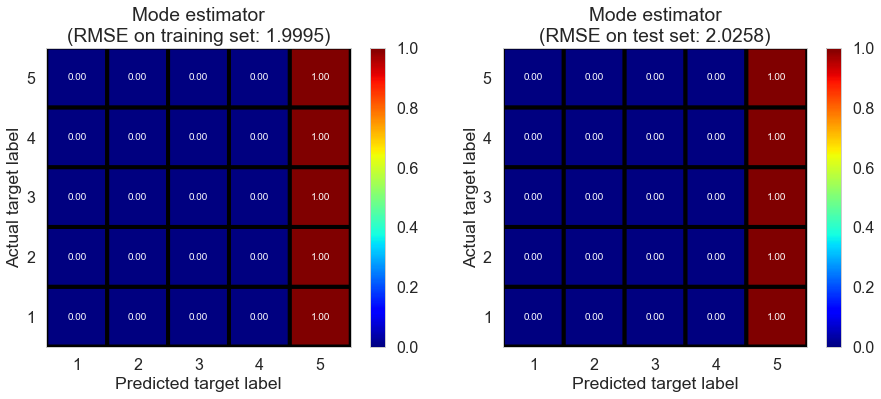

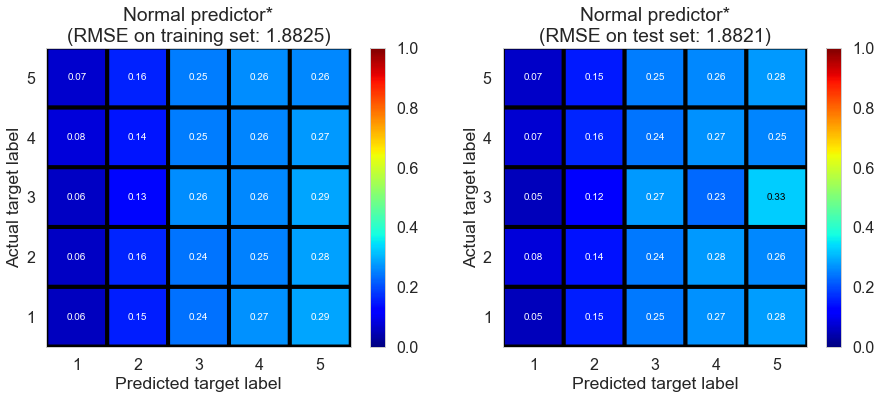

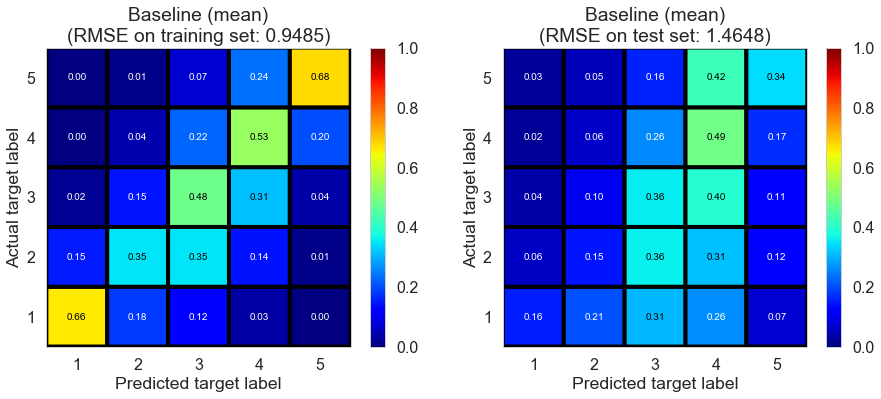

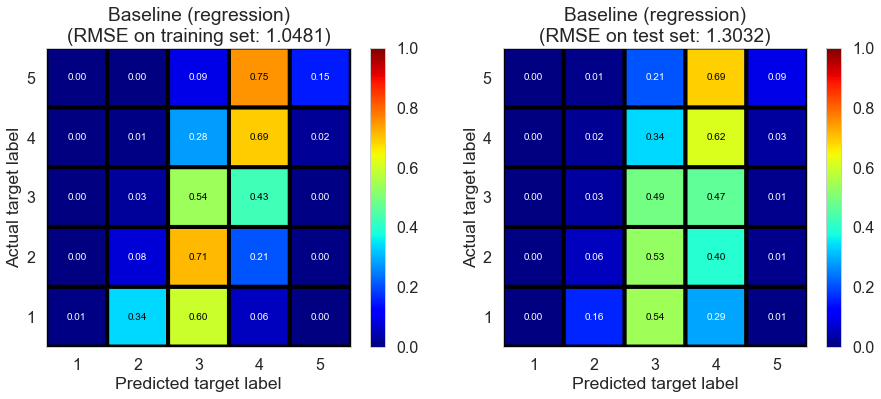

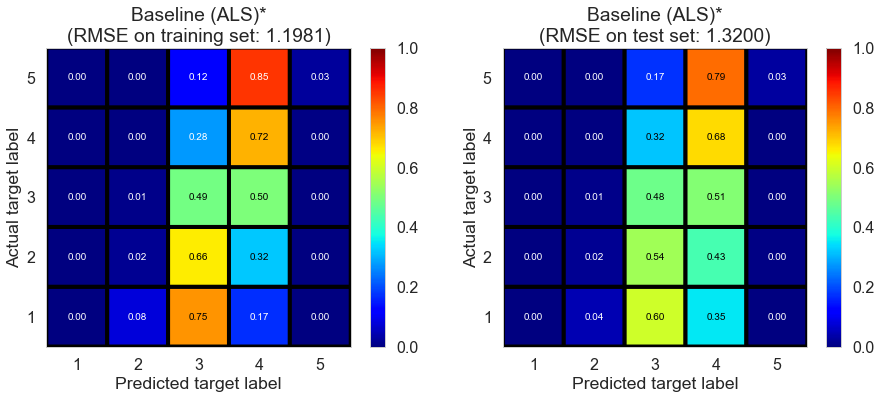

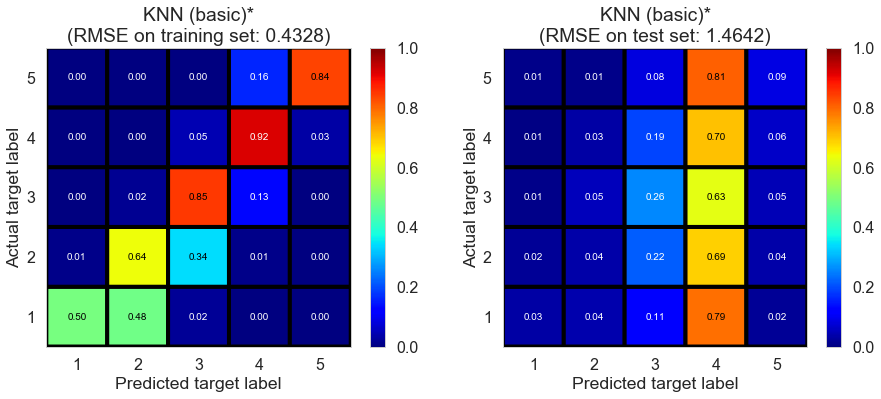

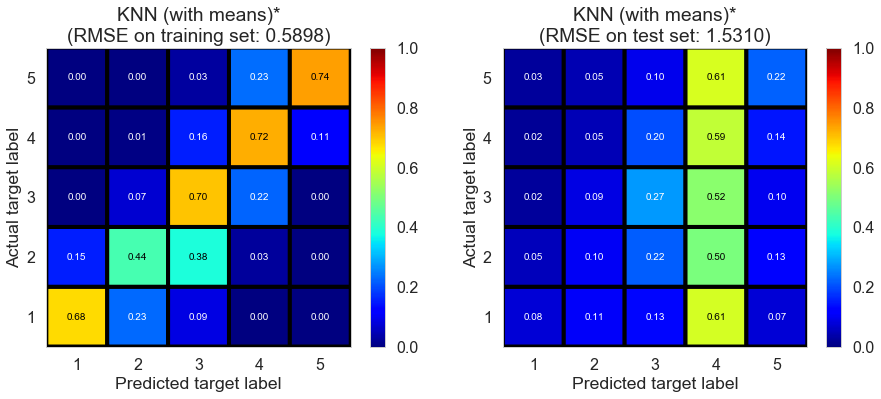

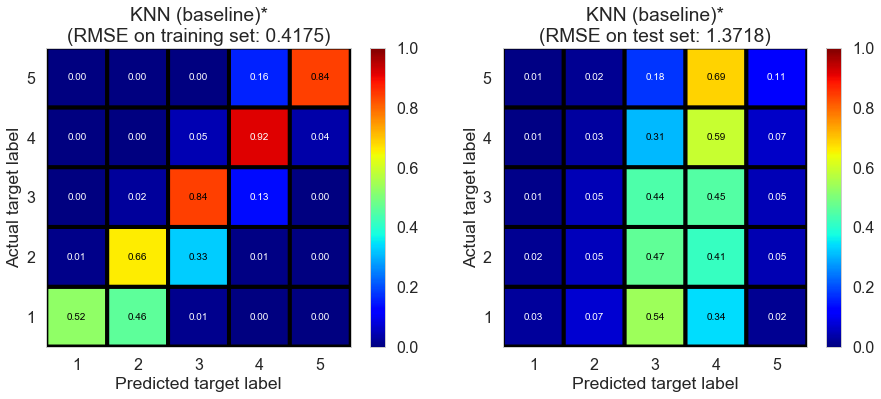

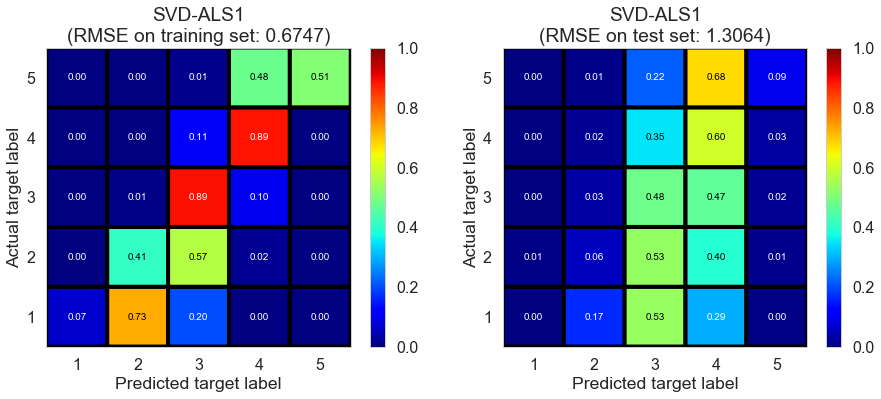

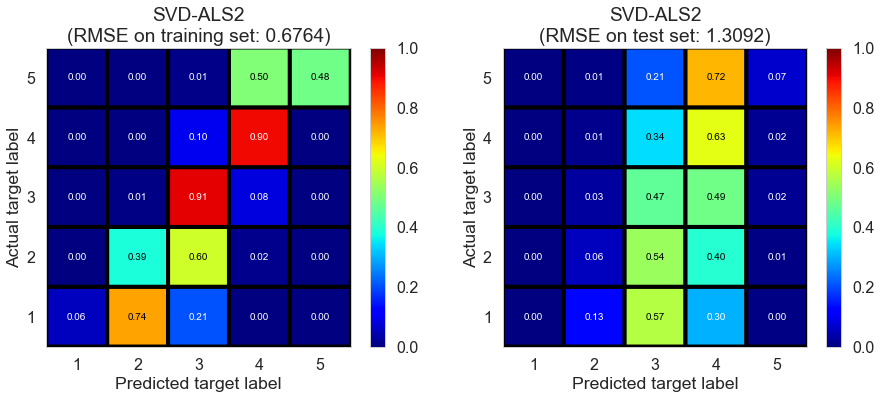

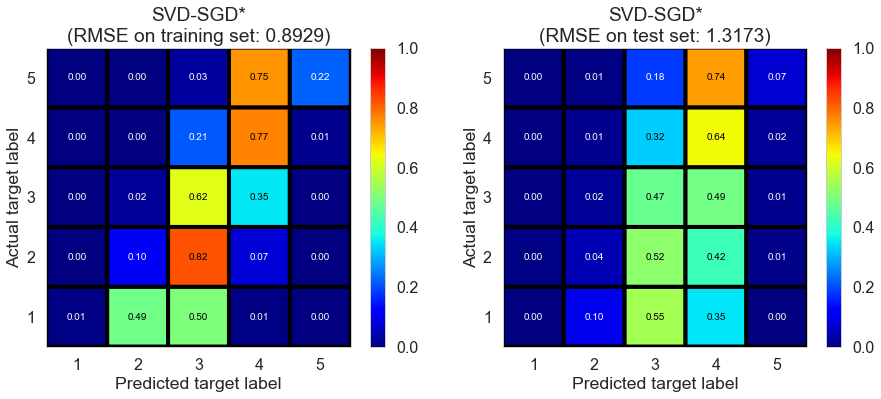

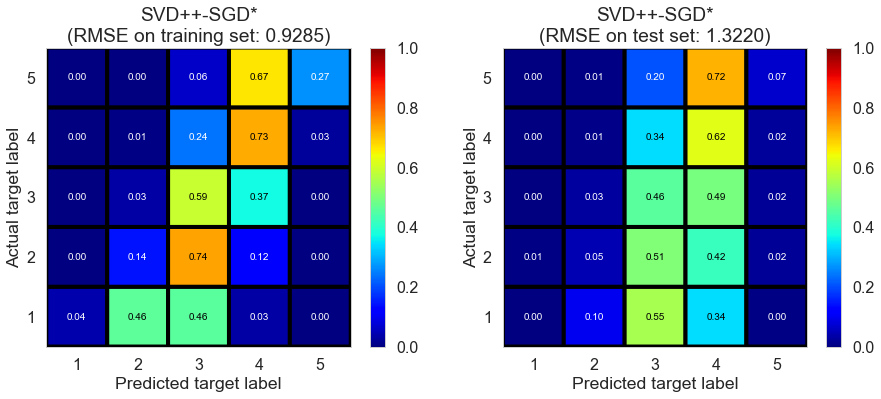

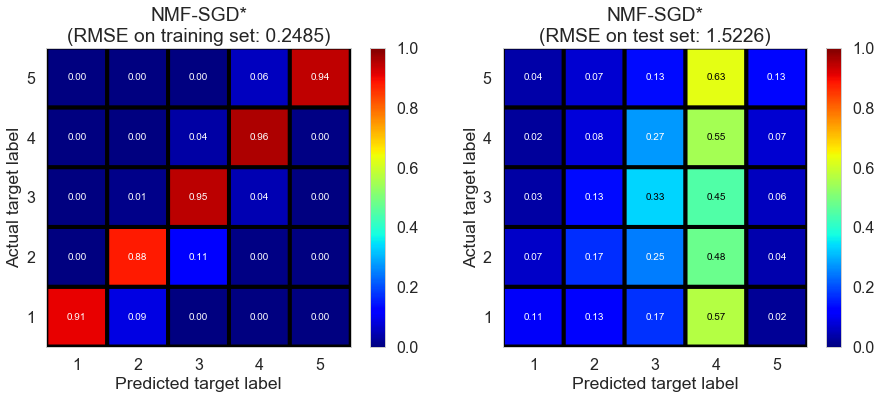

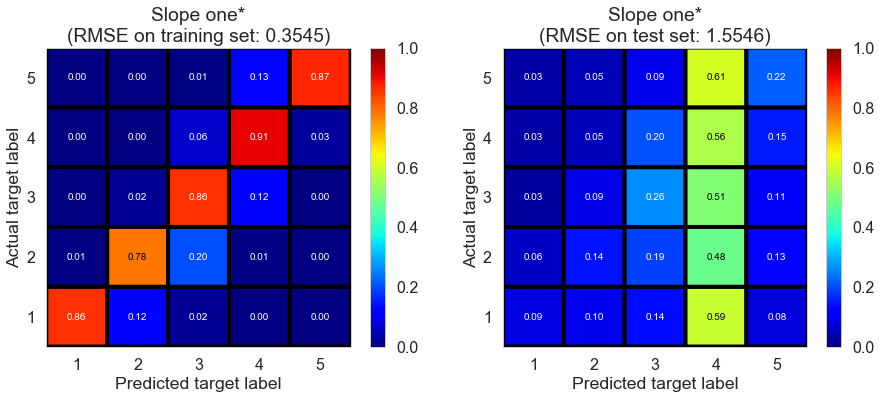

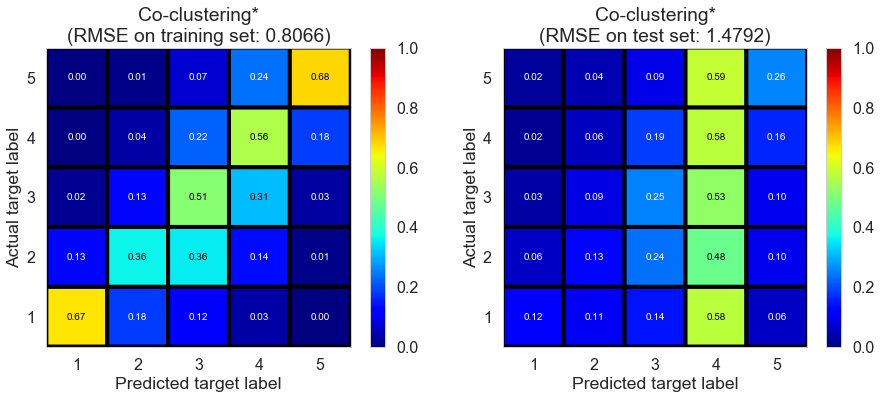

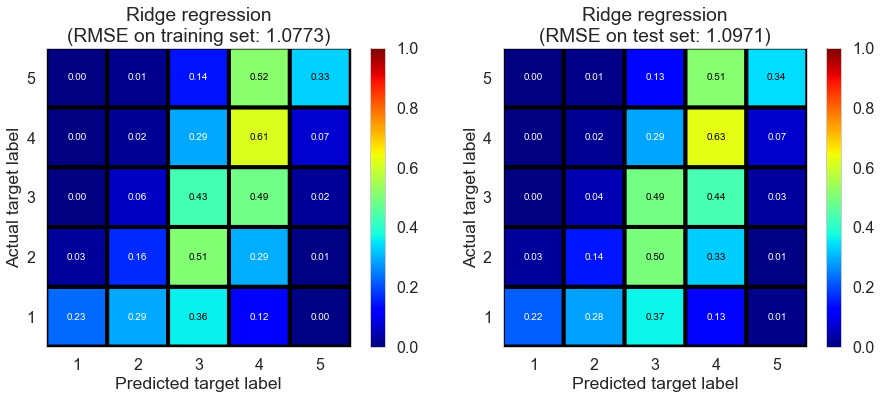

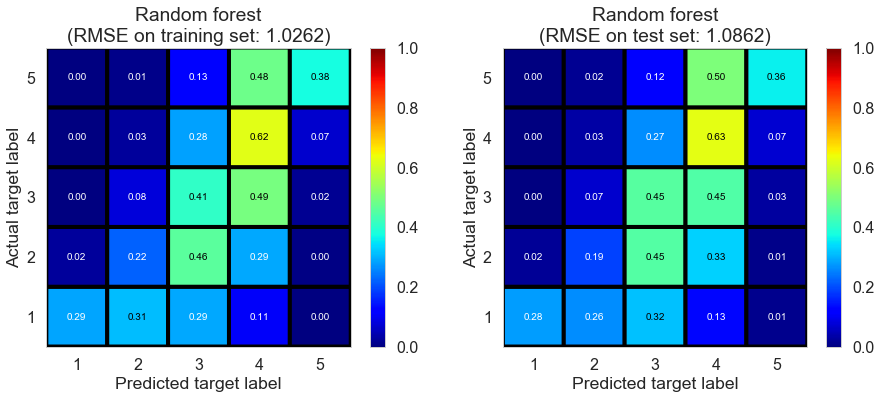

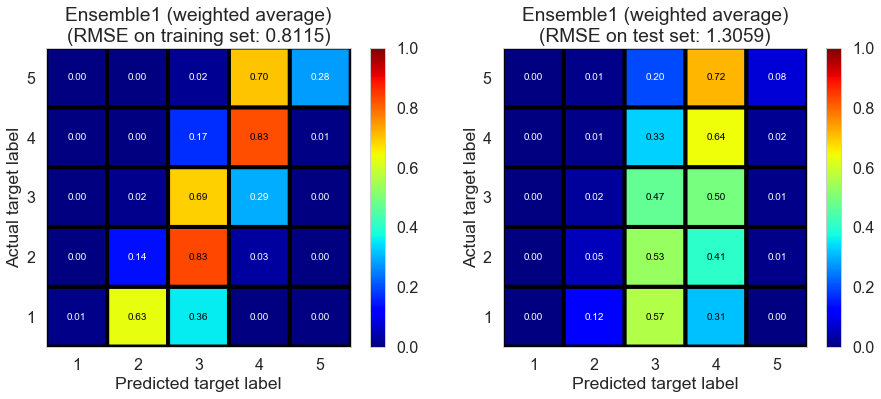

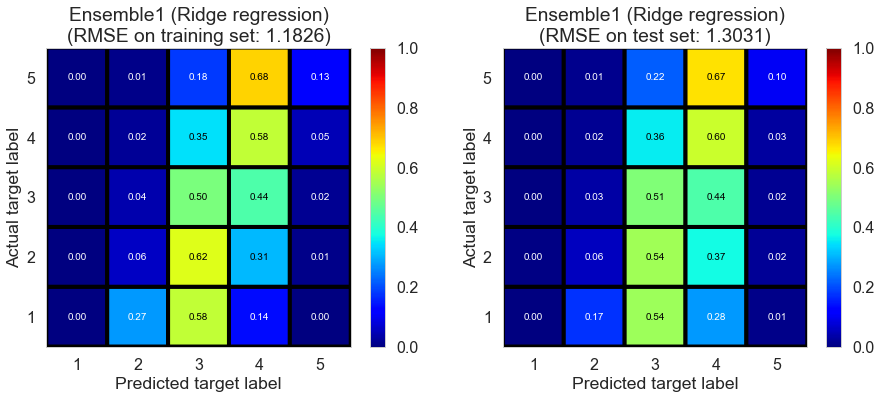

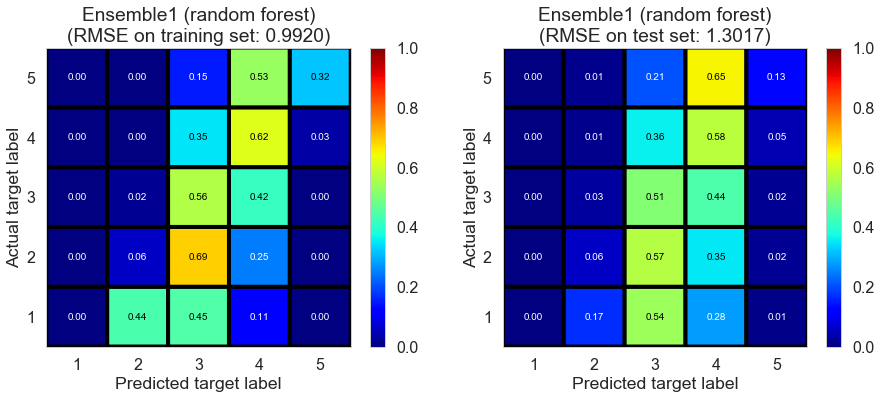

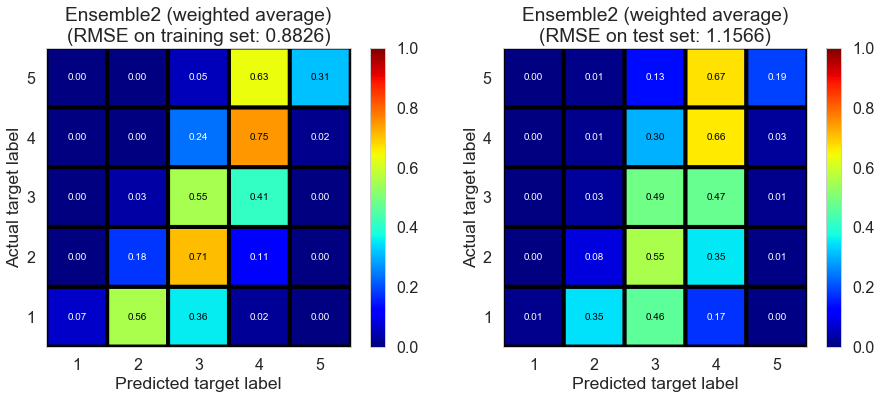

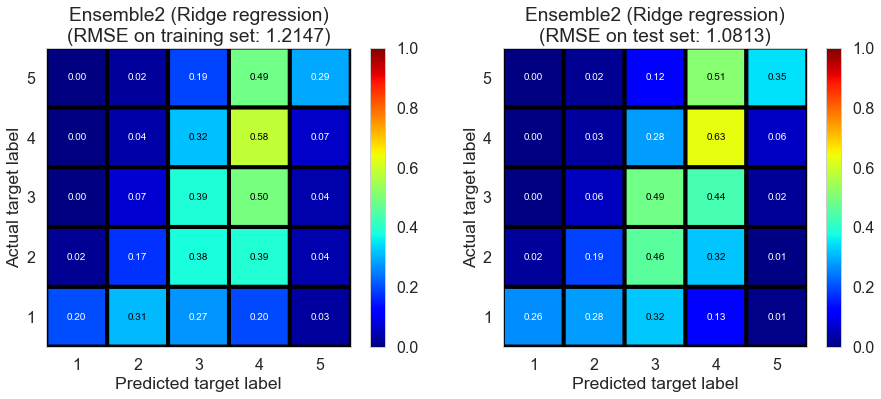

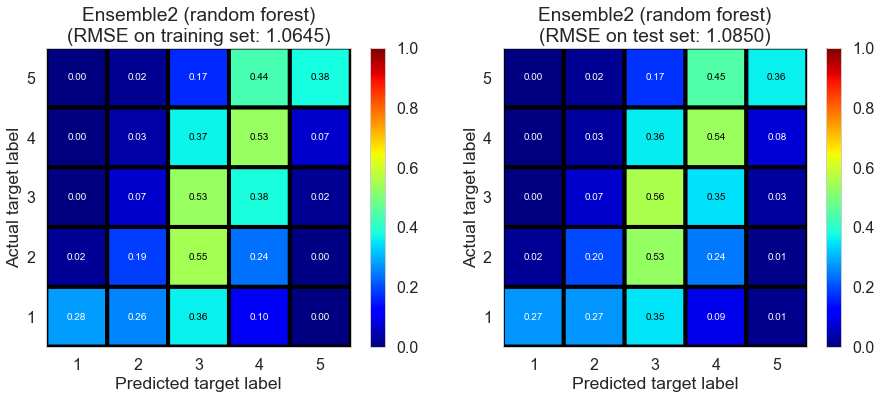

<br><br>

## Cleveland <sup>(75932 reviews, 2500 restaurants, 30131 users)</sup>

<sup>(* shows the algorithms we implemented by wrapping around     methods in scikit-surprise python package)</sup>

<sup>(Ensemble1 represents the ensemble of collaborative filtering models;     Ensemble2 represents the ensemble of collaborative filtering and content filtering models)</sup>

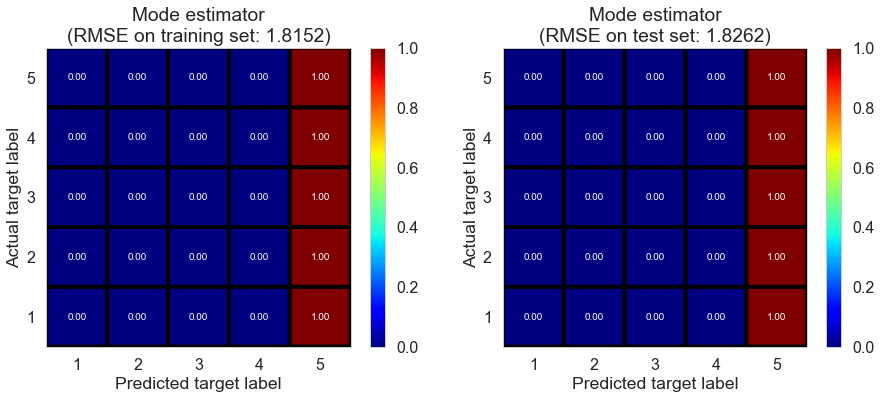

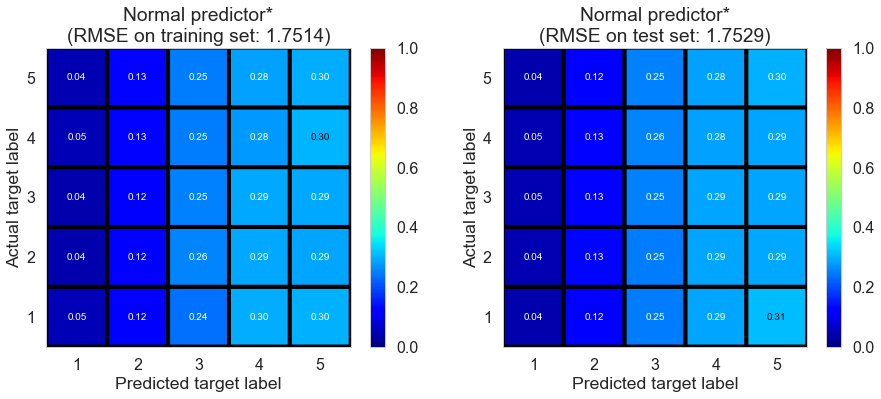

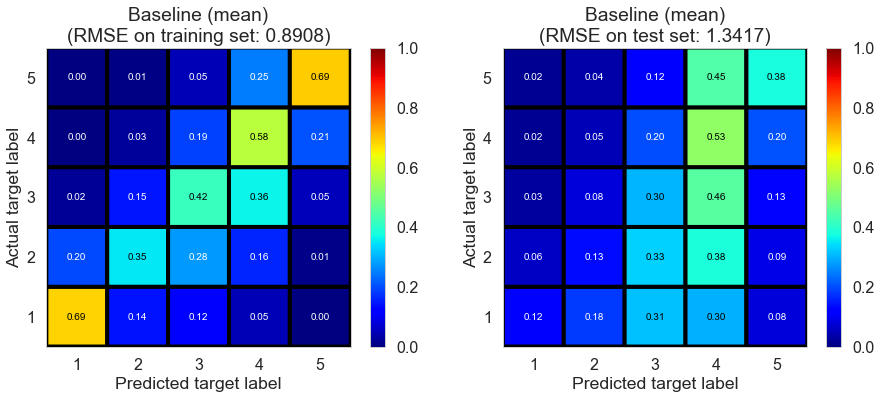

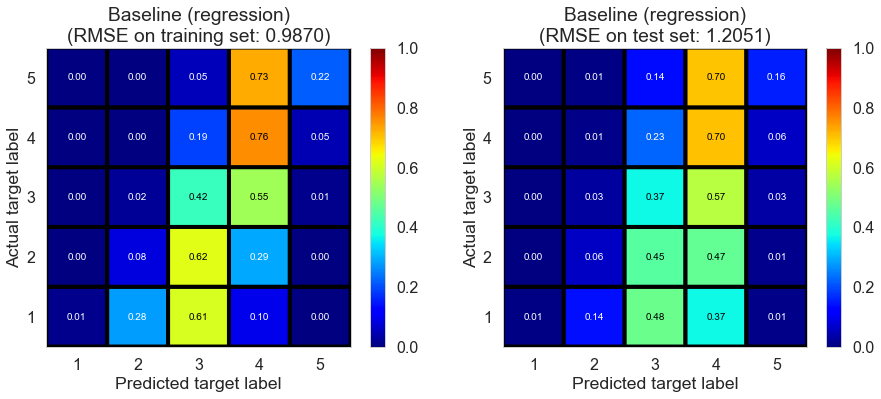

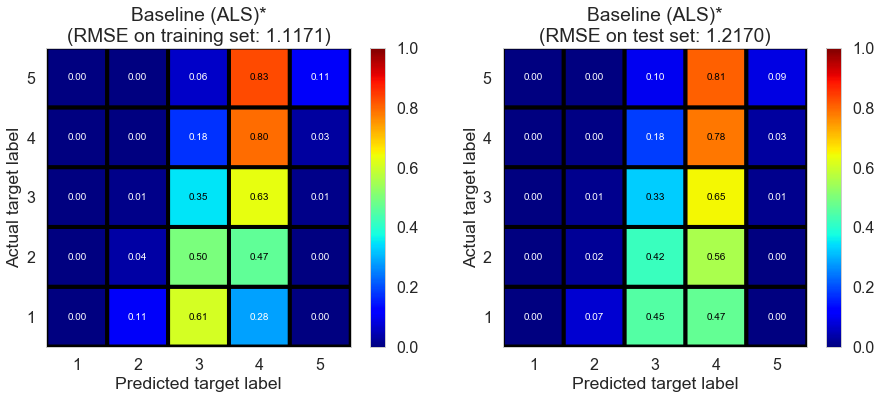

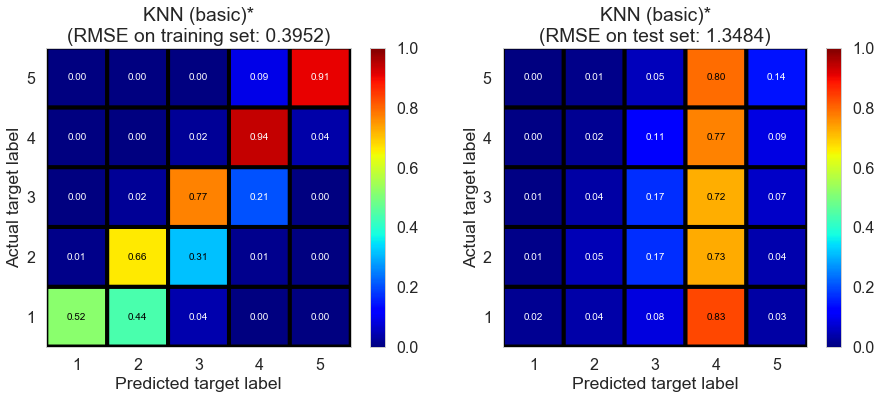

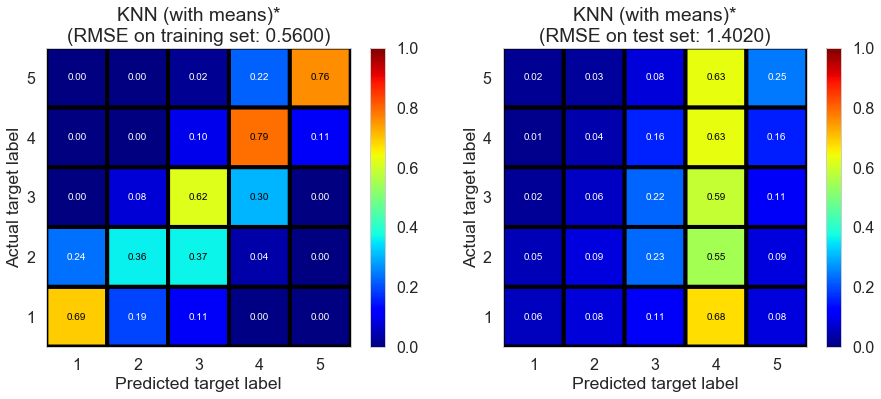

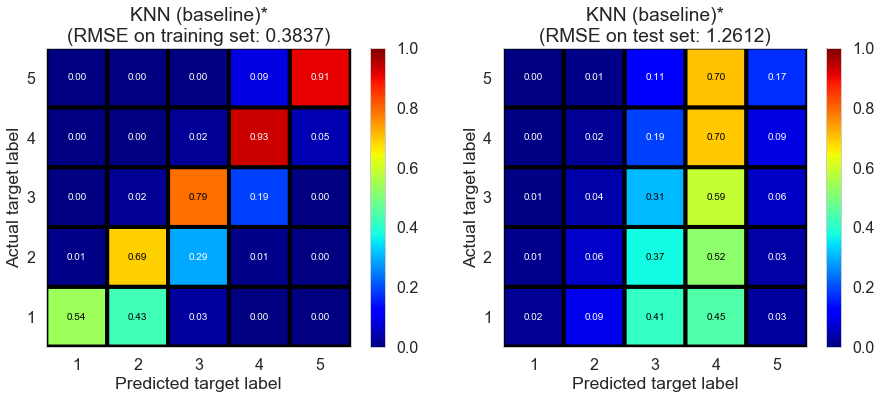

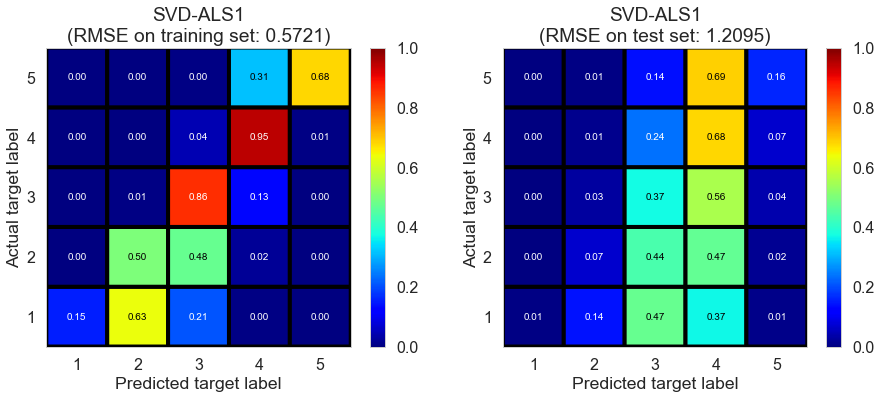

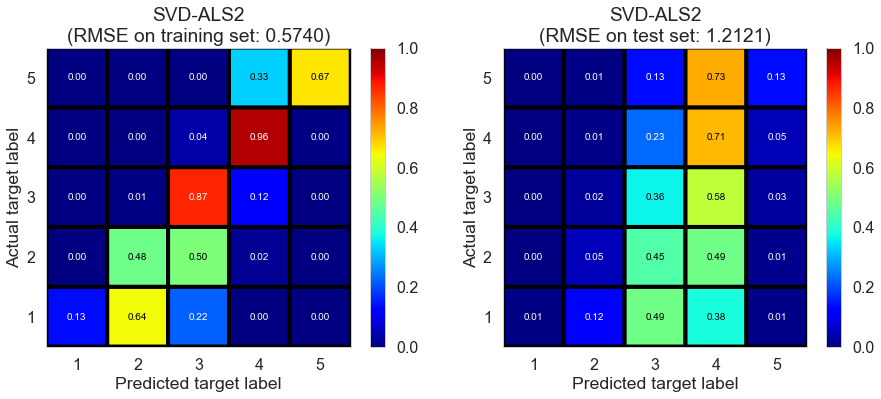

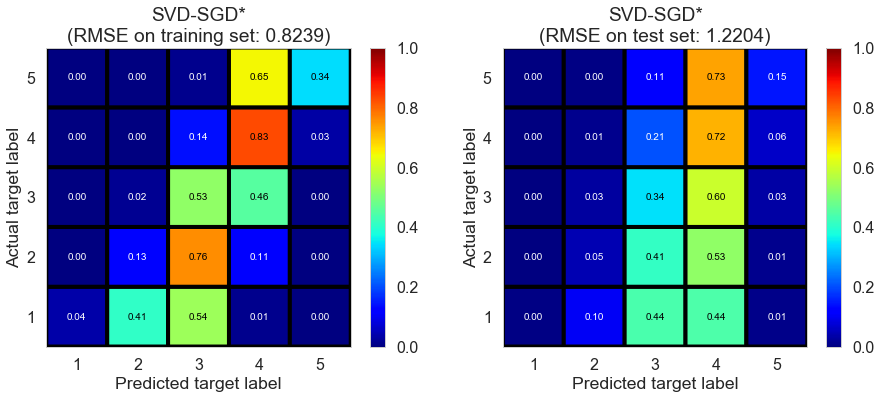

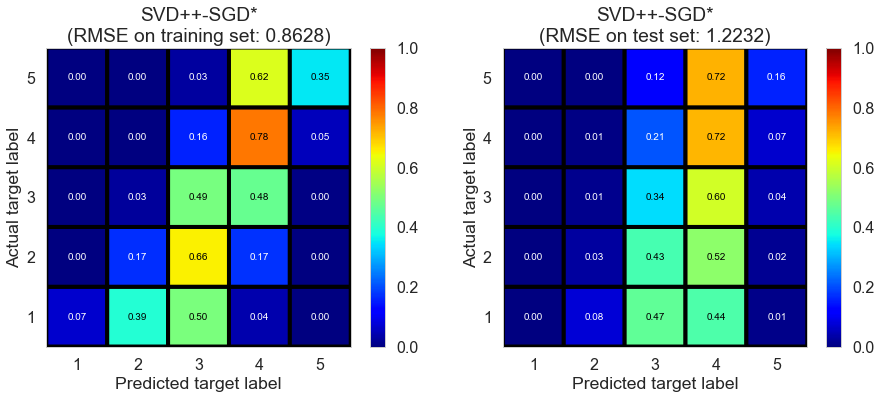

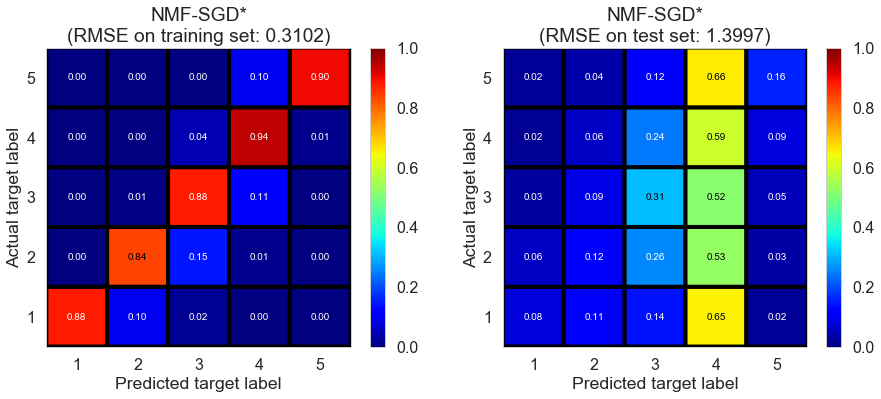

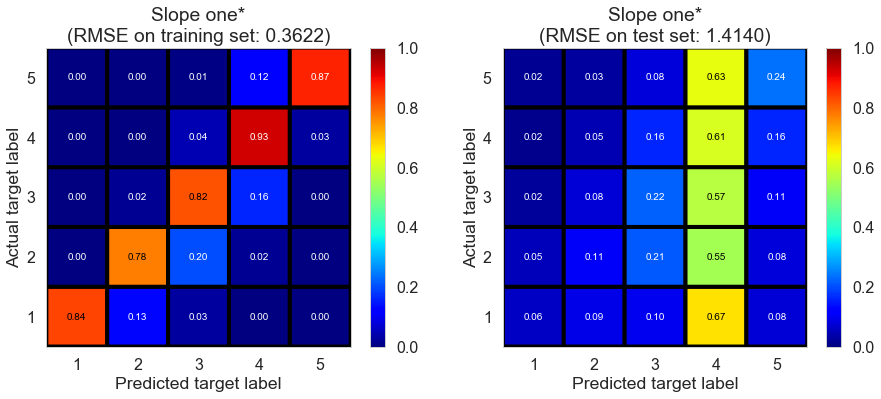

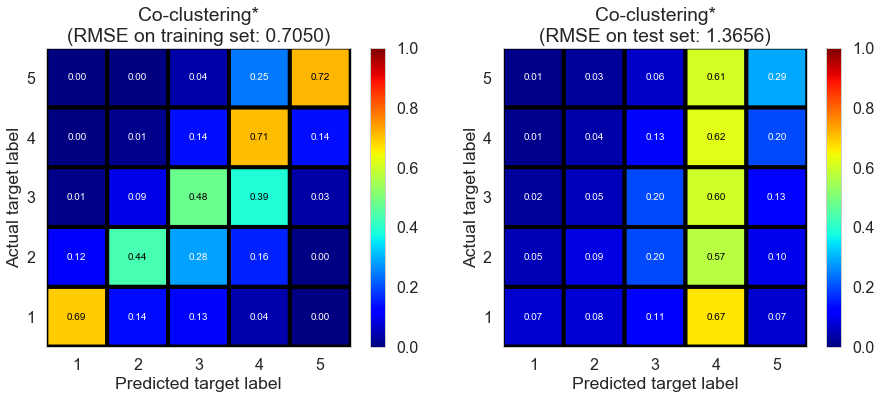

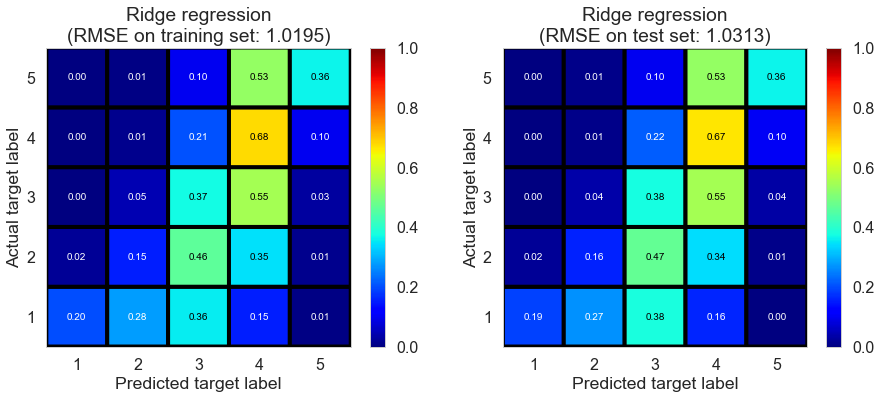

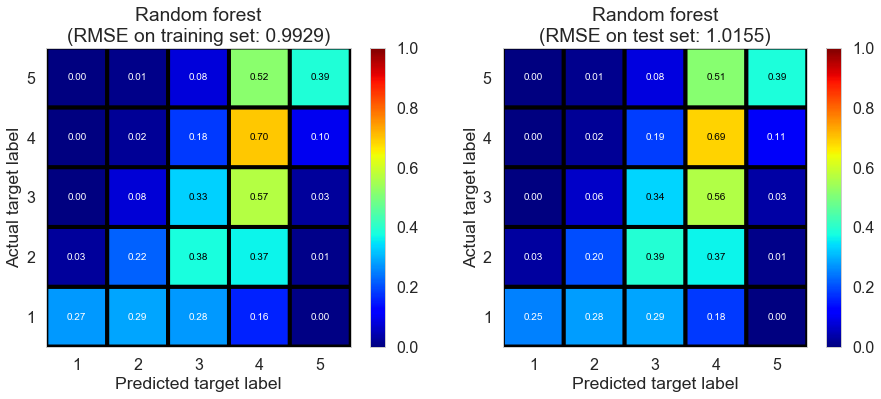

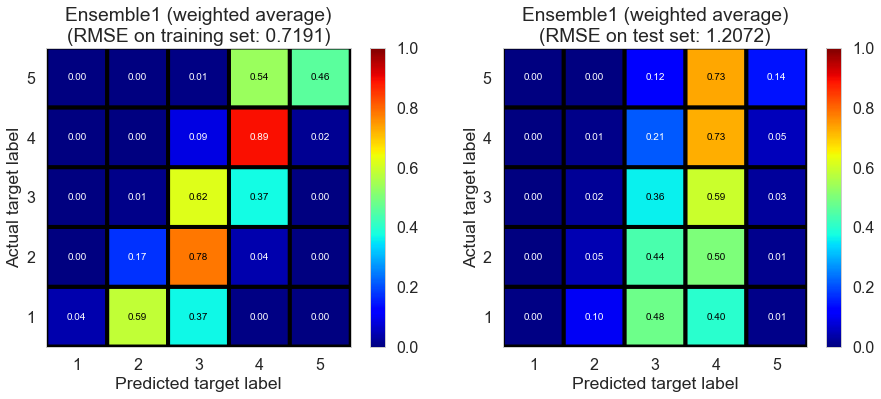

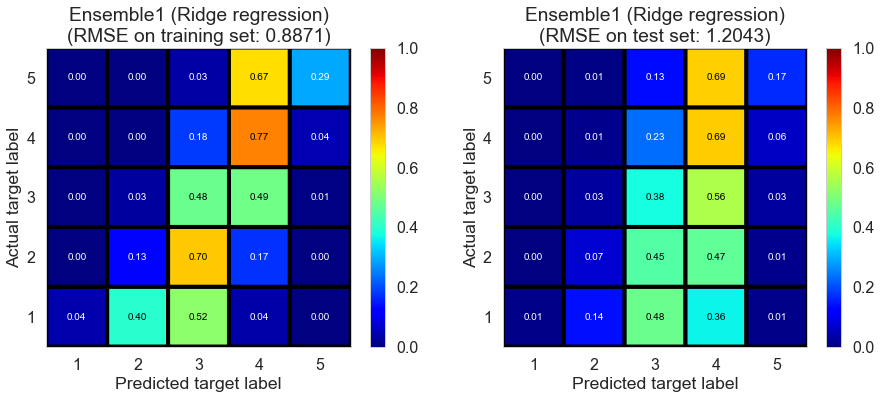

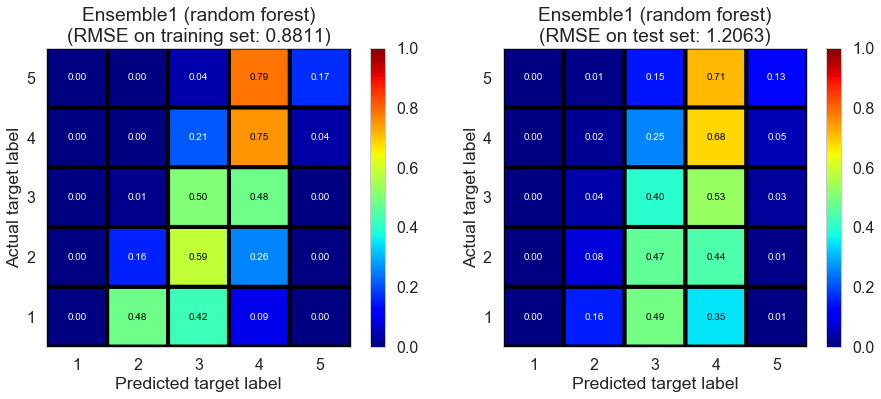

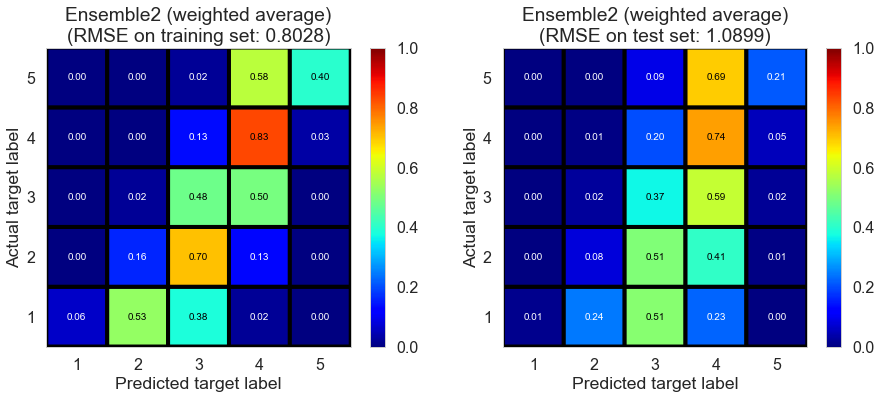

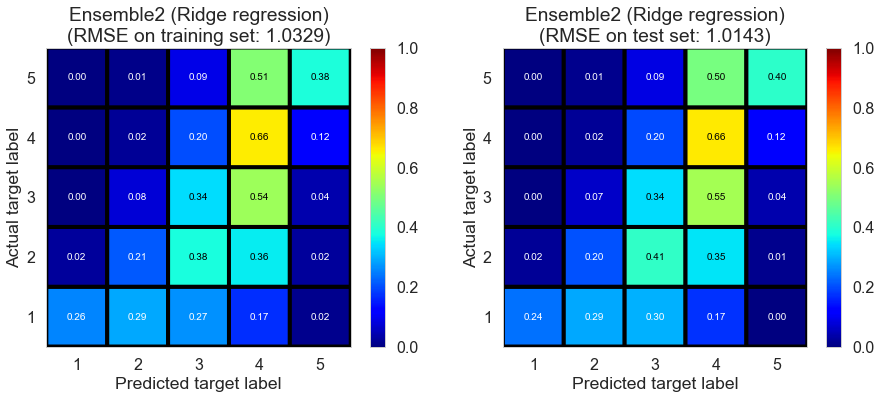

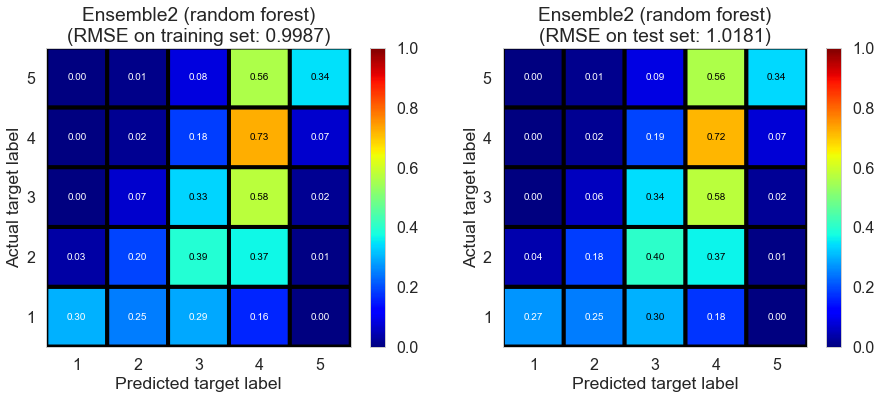

<br><br>

## Pittsburgh <sup>(143682 reviews, 4745 restaurants, 46179 users)</sup>

<sup>(* shows the algorithms we implemented by wrapping around     methods in scikit-surprise python package)</sup>

<sup>(Ensemble1 represents the ensemble of collaborative filtering models;     Ensemble2 represents the ensemble of collaborative filtering and content filtering models)</sup>

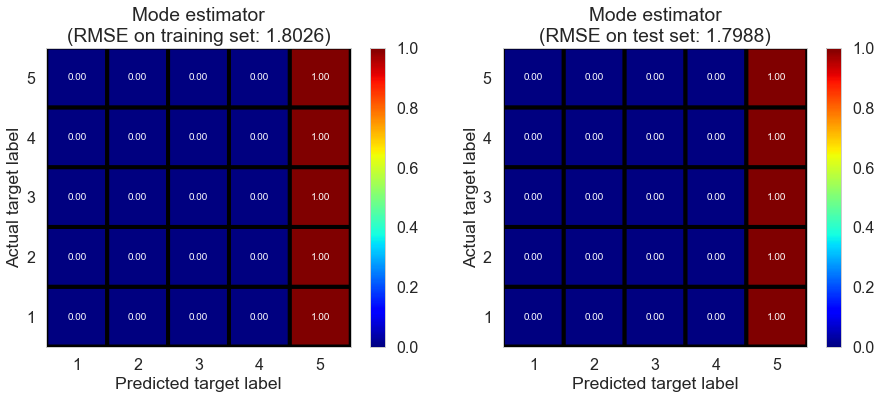

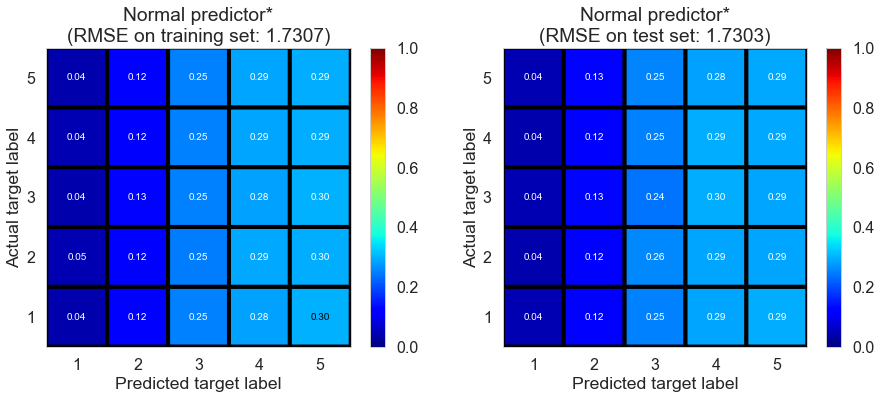

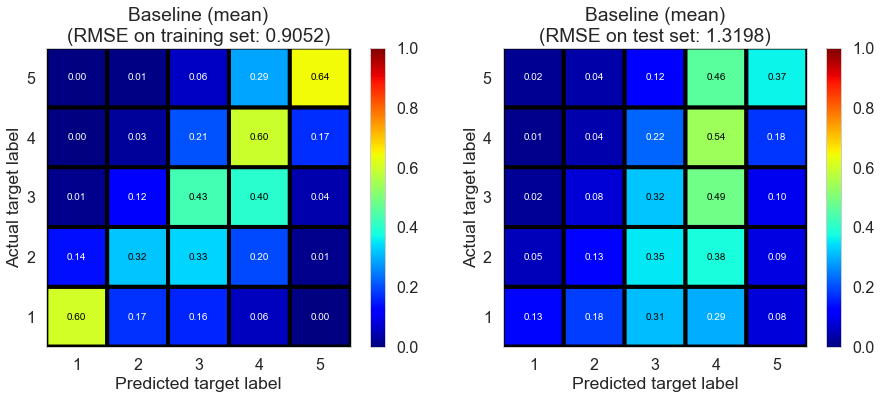

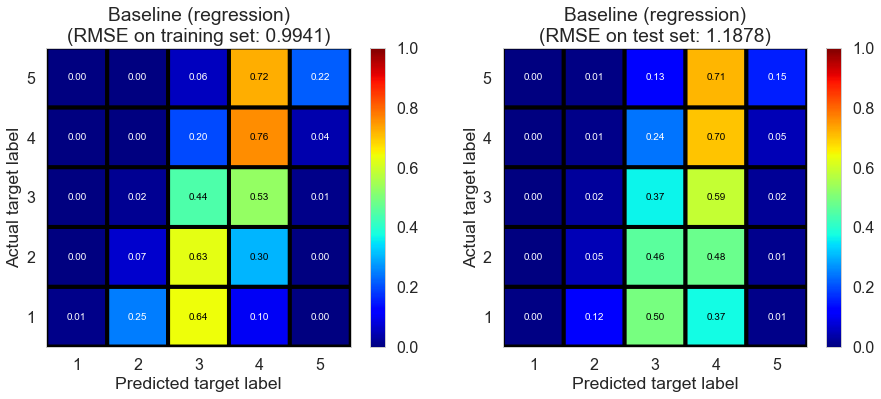

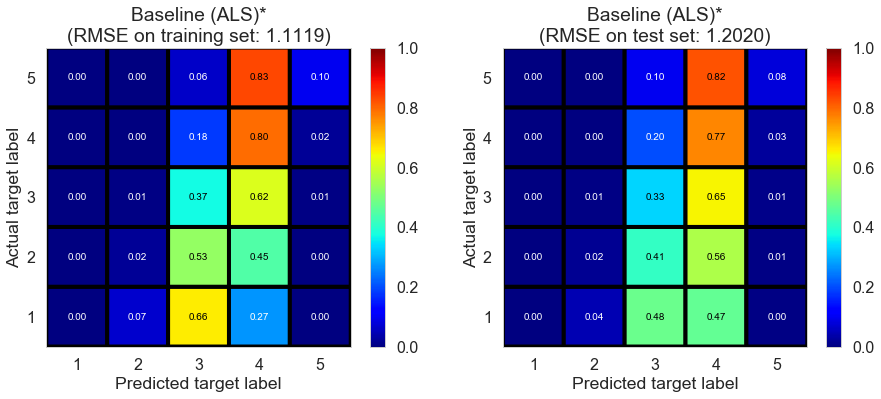

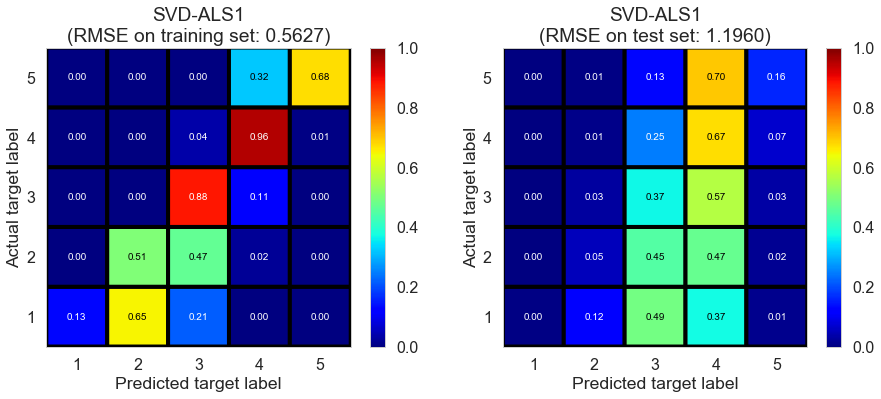

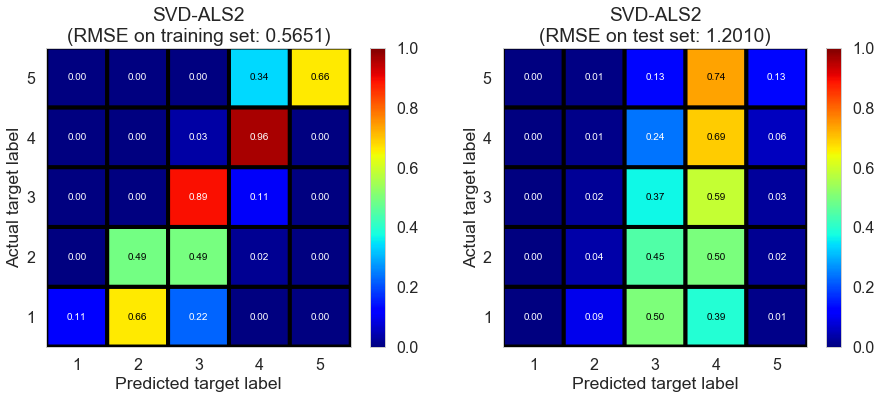

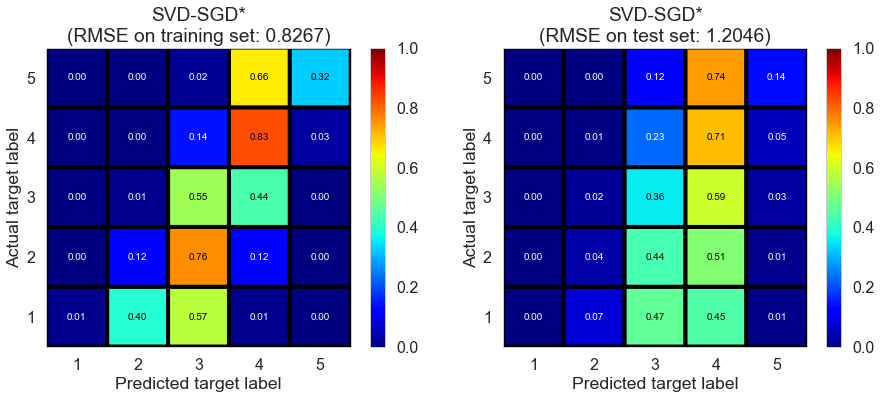

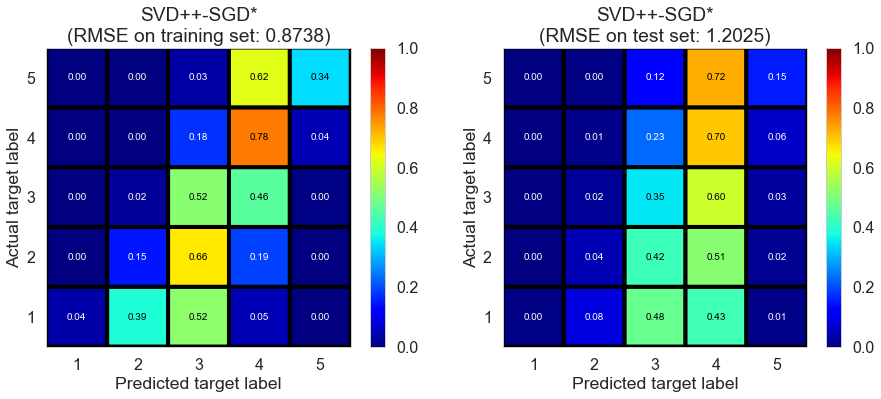

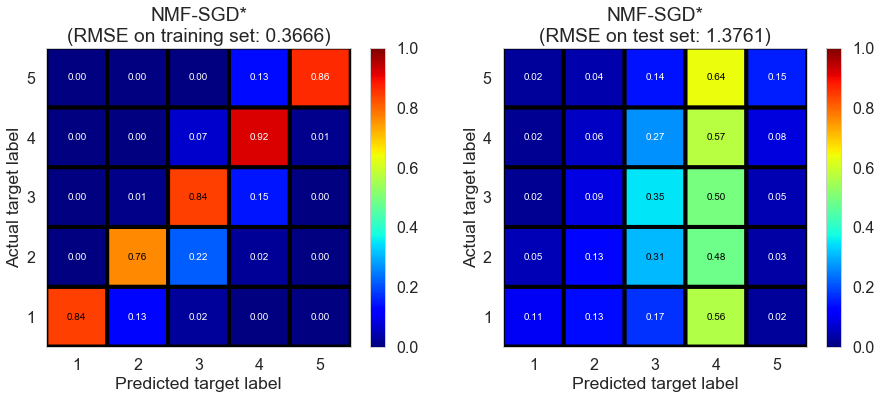

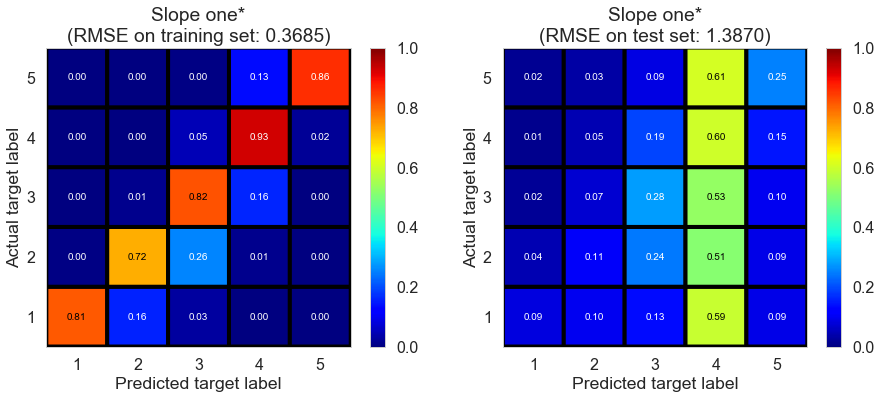

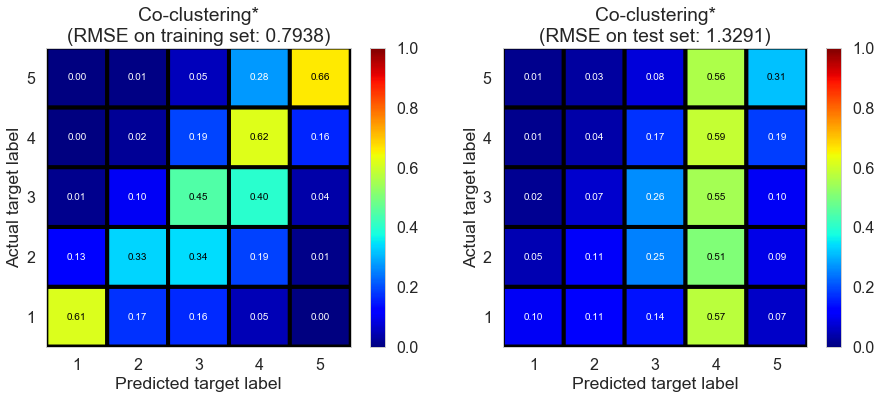

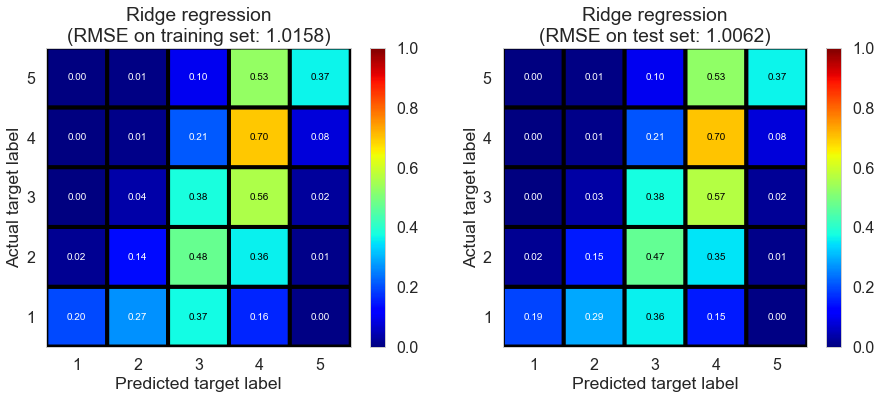

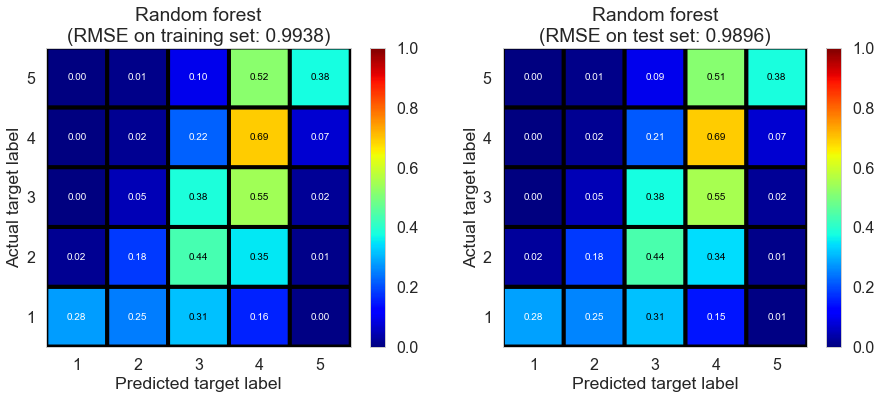

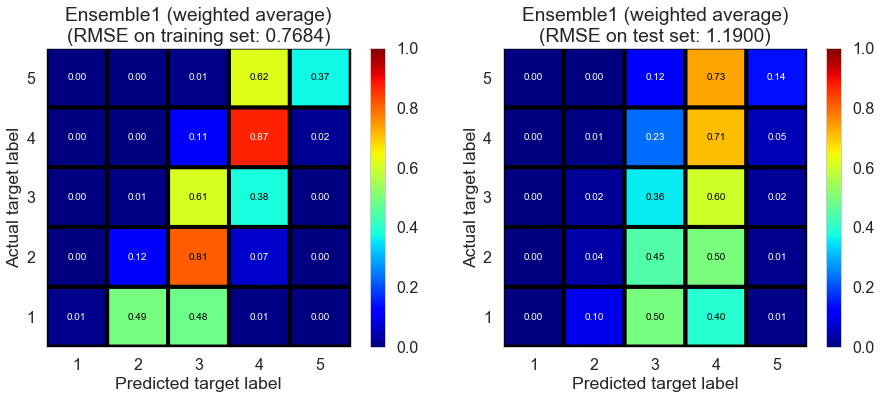

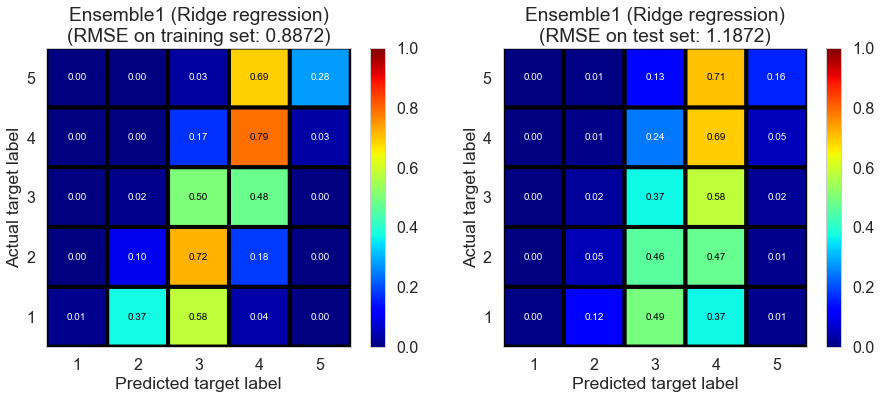

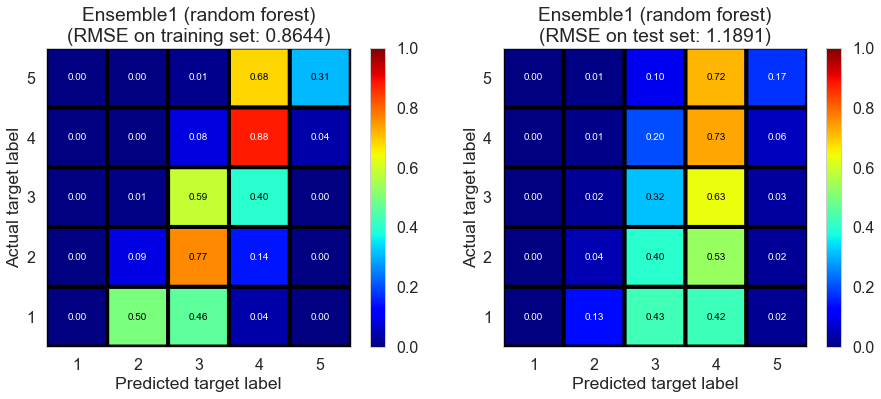

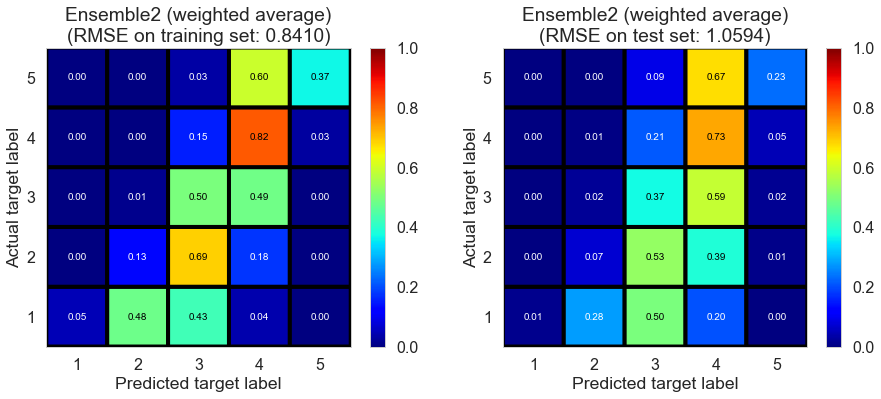

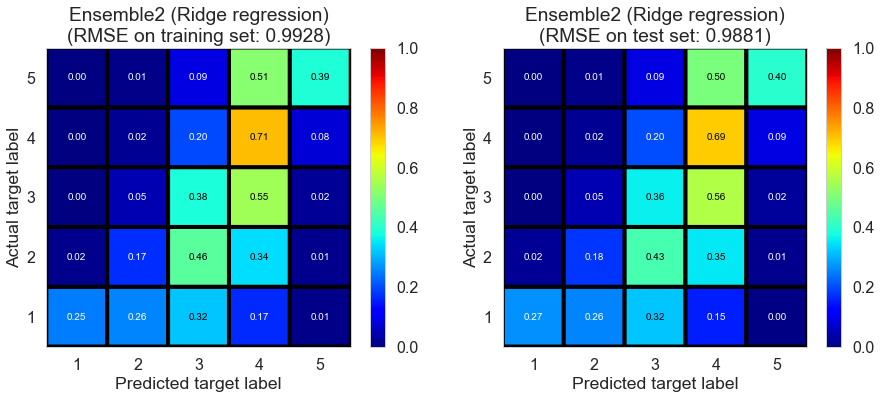

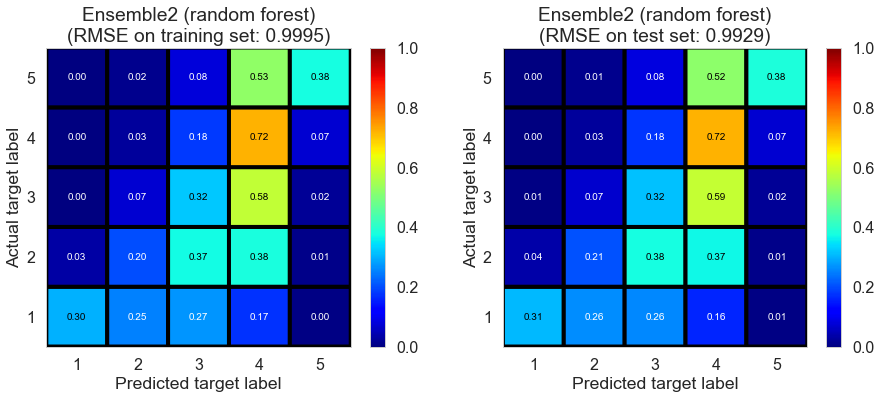

<br><br>

## Toronto <sup>(331407 reviews, 12118 restaurants, 77506 users)</sup>

<sup>(* shows the algorithms we implemented by wrapping around     methods in scikit-surprise python package)</sup>

<sup>(Ensemble1 represents the ensemble of collaborative filtering models;     Ensemble2 represents the ensemble of collaborative filtering and content filtering models)</sup>

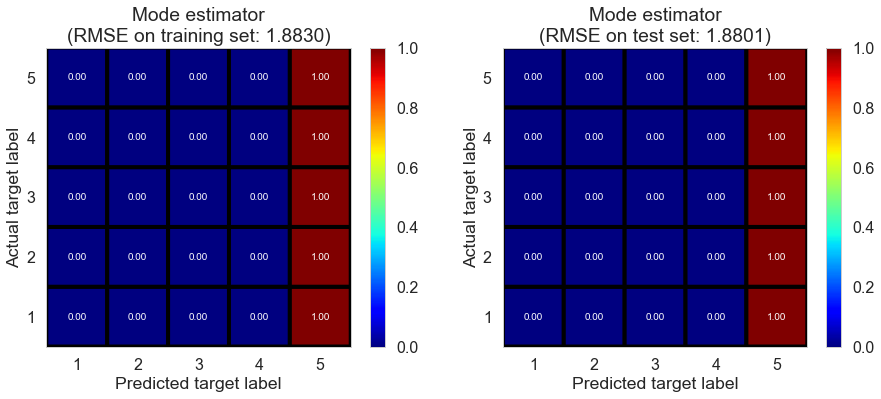

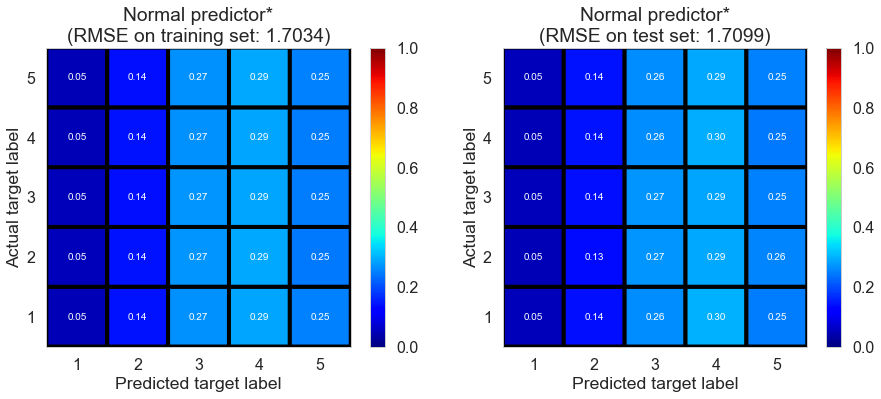

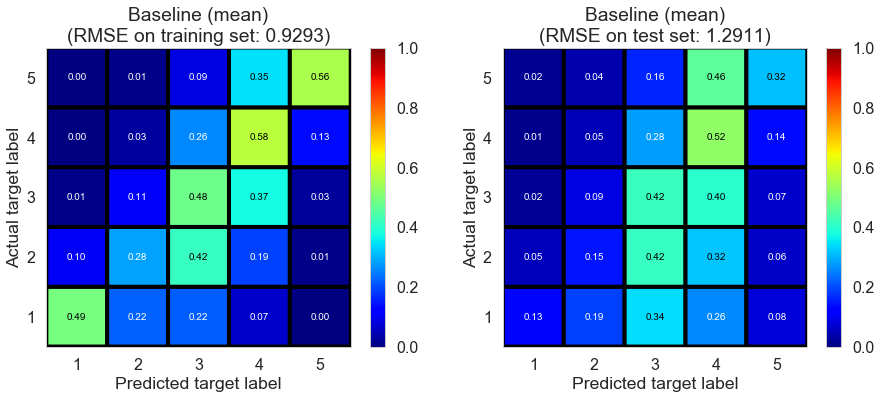

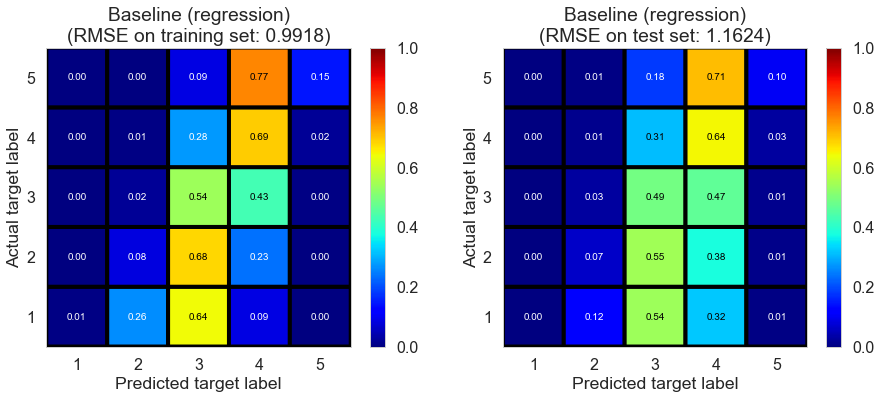

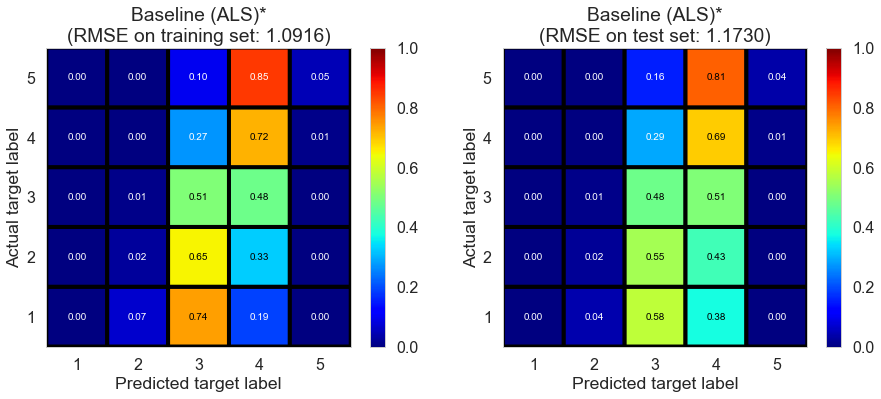

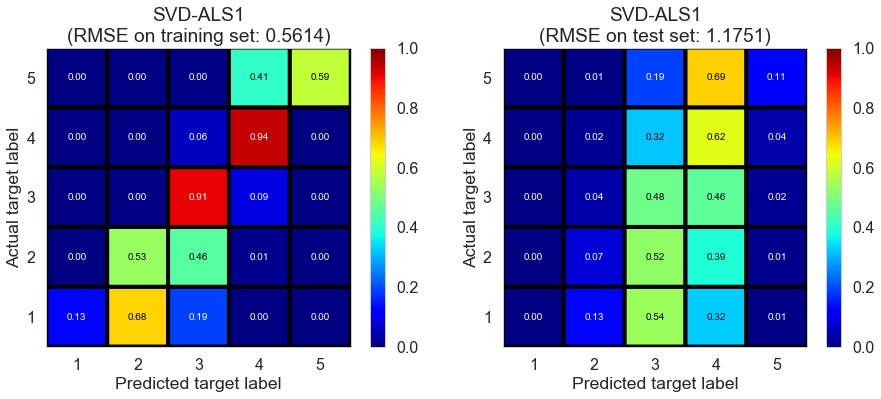

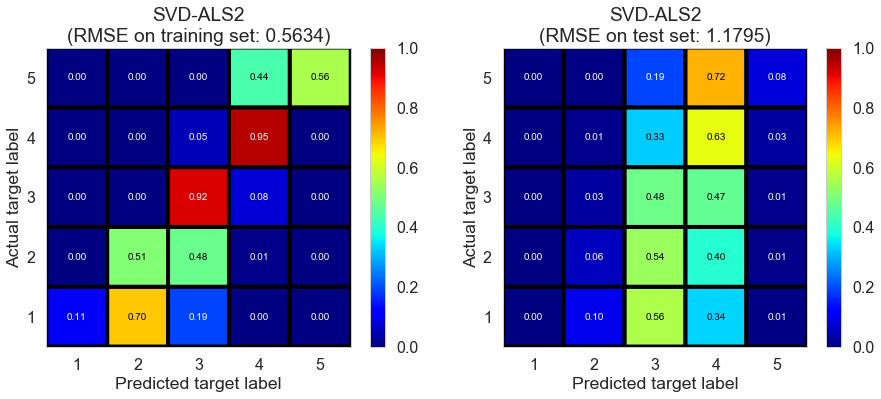

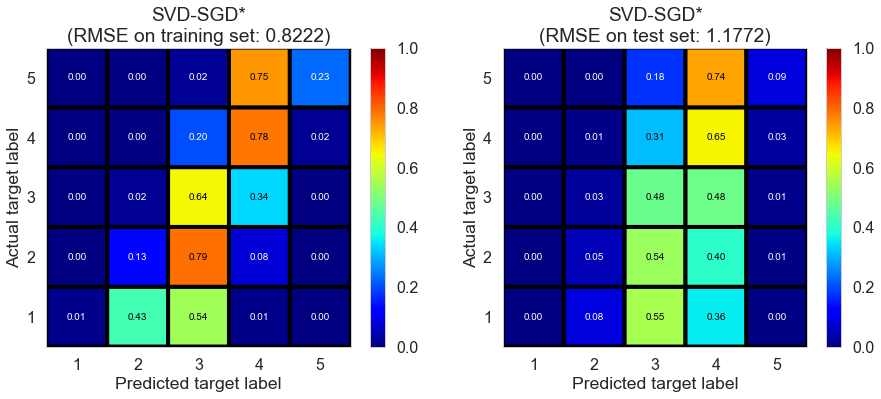

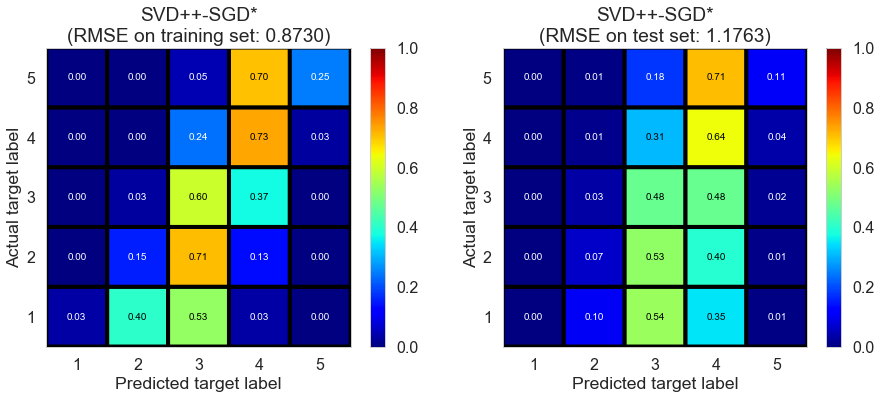

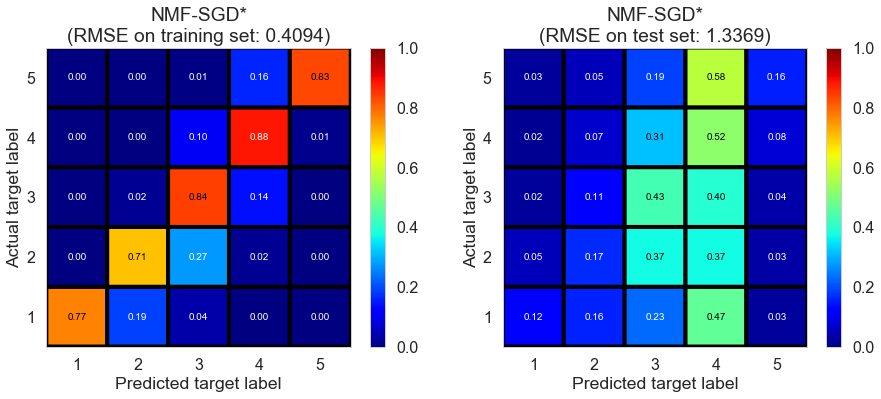

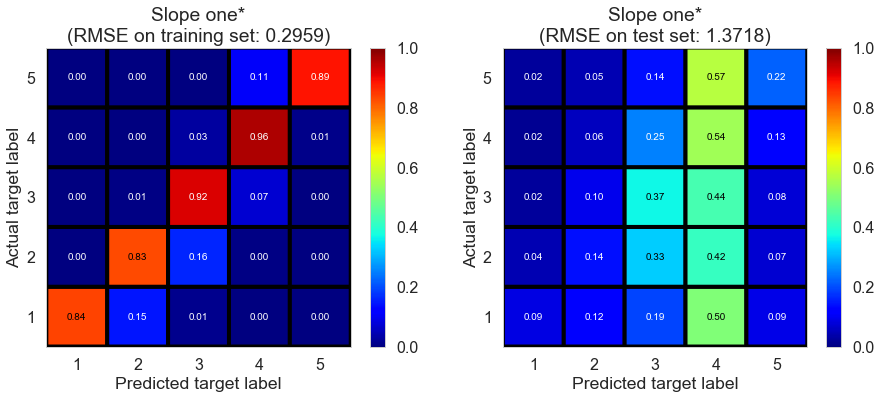

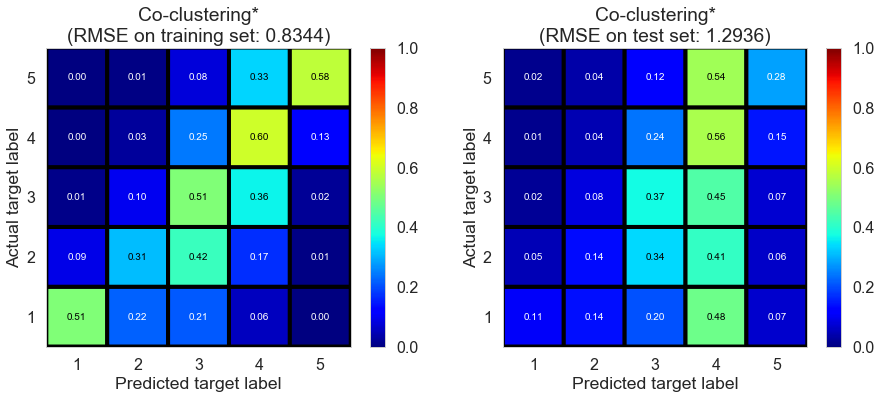

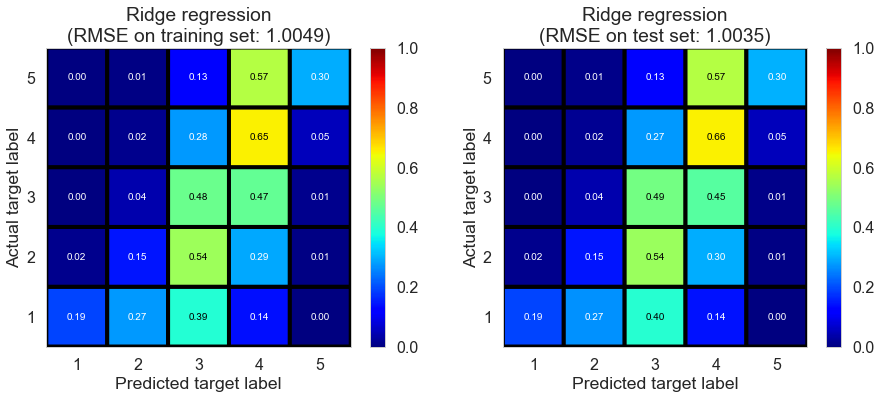

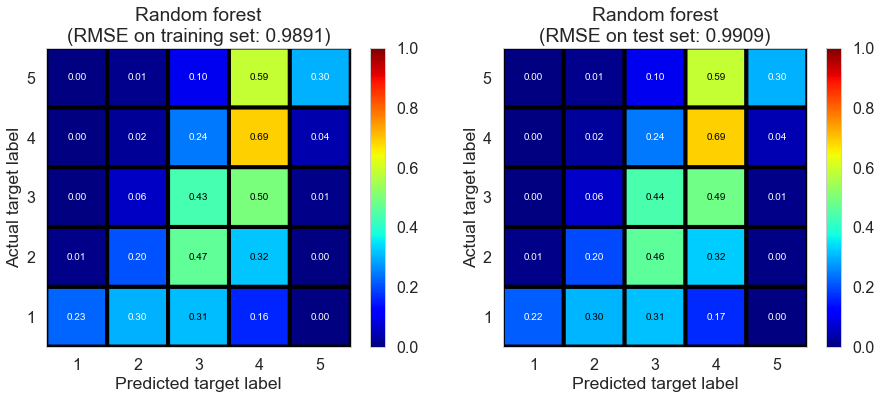

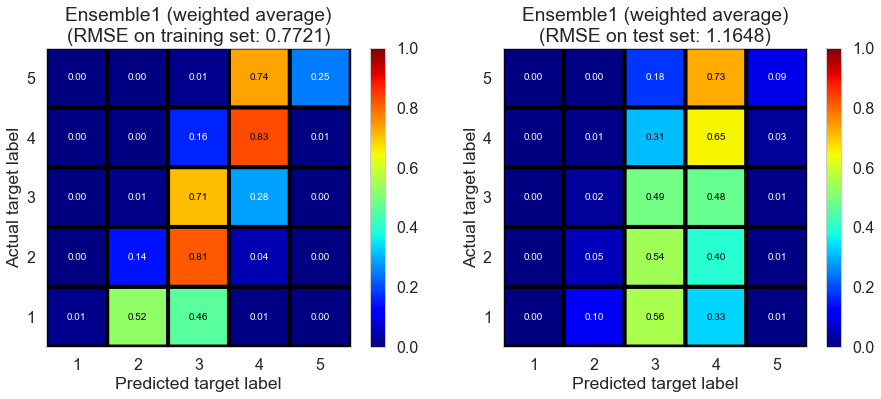

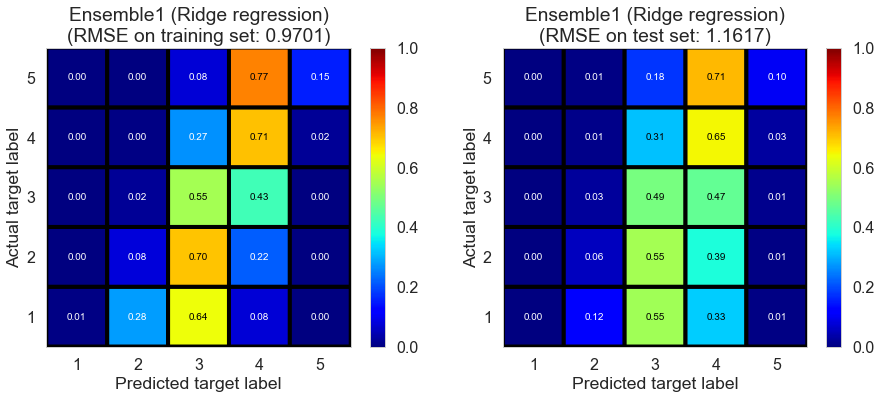

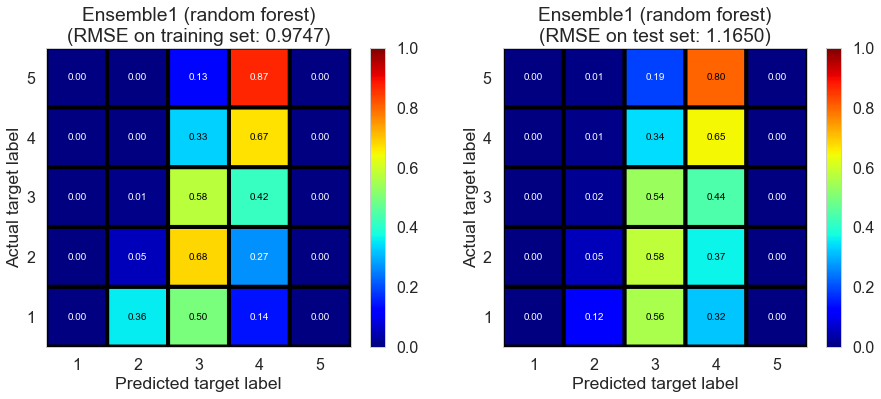

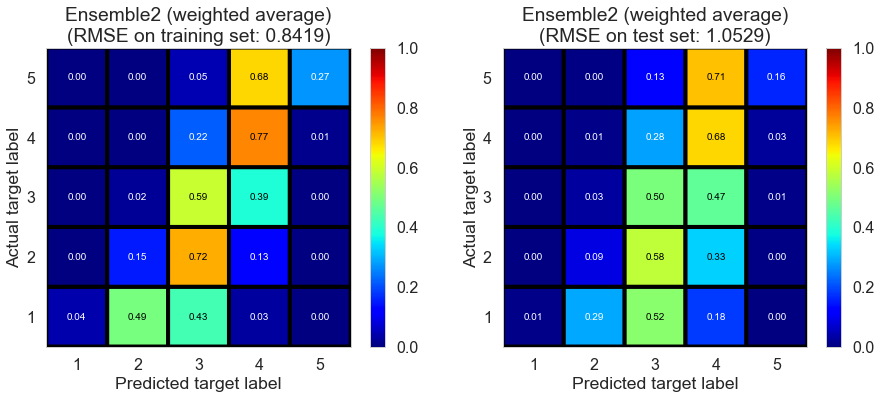

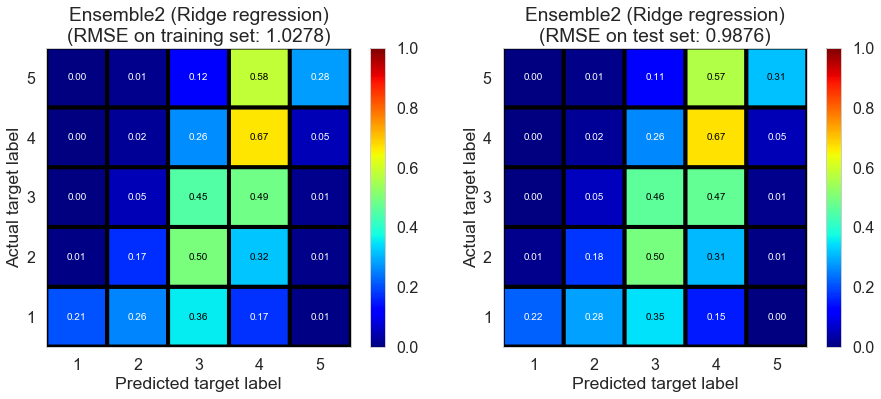

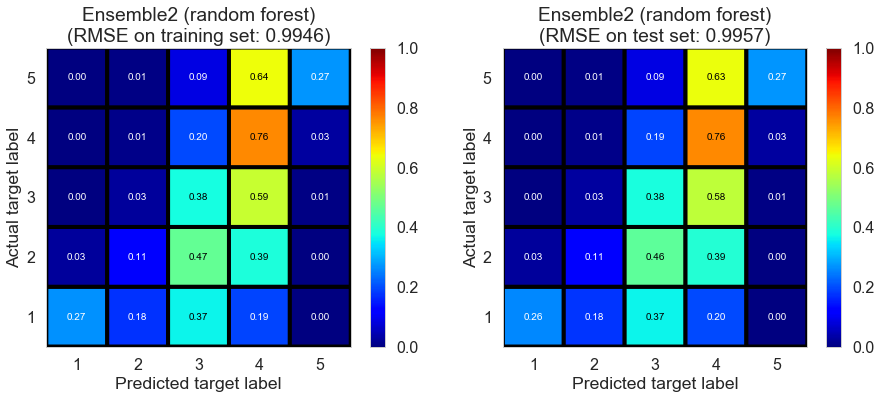

<br><br>

## Las_Vegas <sup>(1280896 reviews, 20434 restaurants, 429363 users)</sup>

<sup>(* shows the algorithms we implemented by wrapping around     methods in scikit-surprise python package)</sup>

<sup>(Ensemble1 represents the ensemble of collaborative filtering models;     Ensemble2 represents the ensemble of collaborative filtering and content filtering models)</sup>

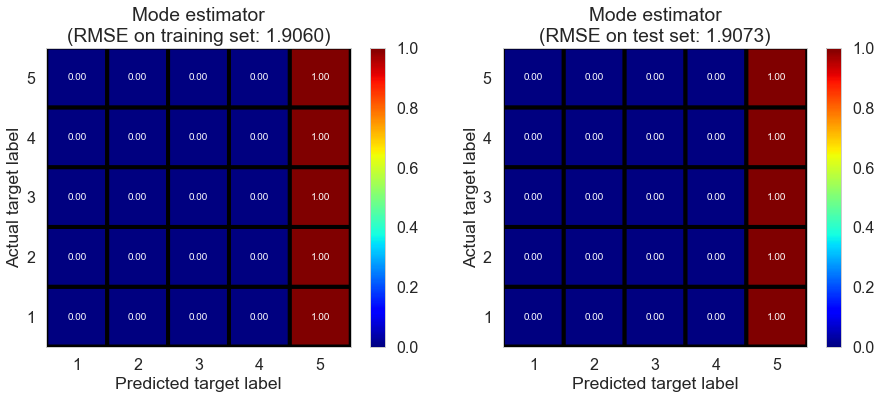

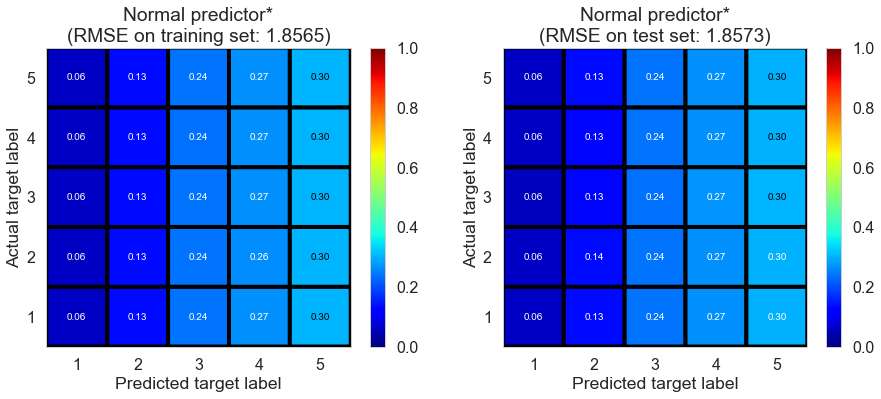

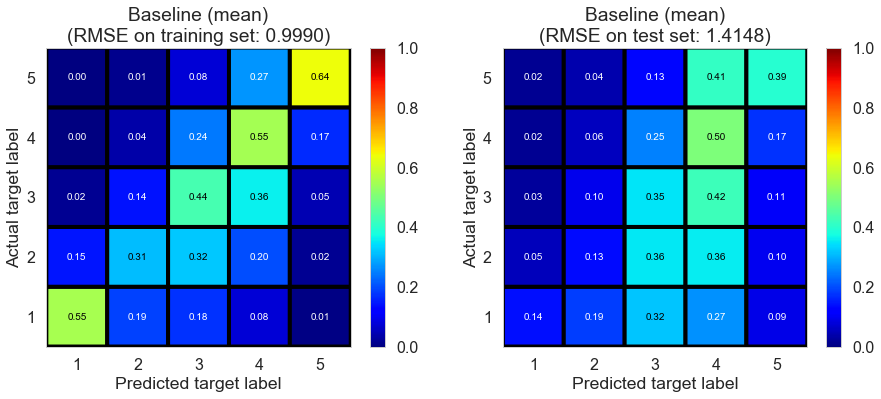

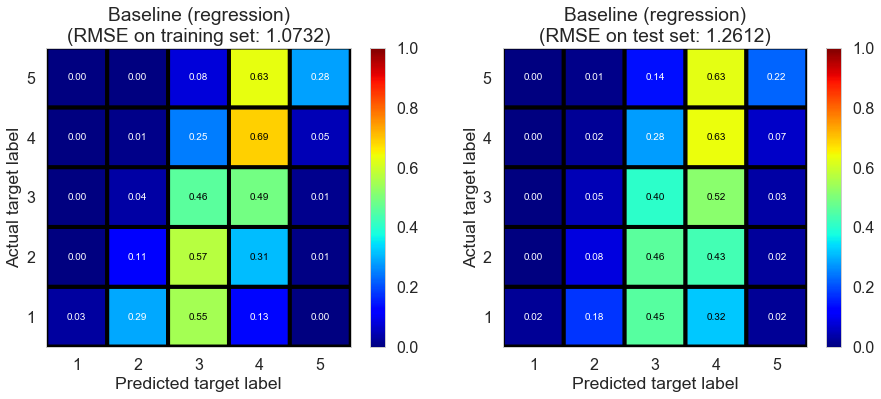

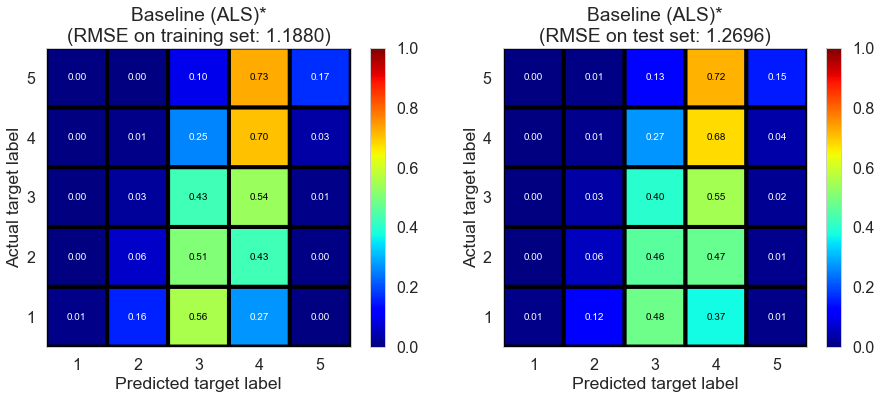

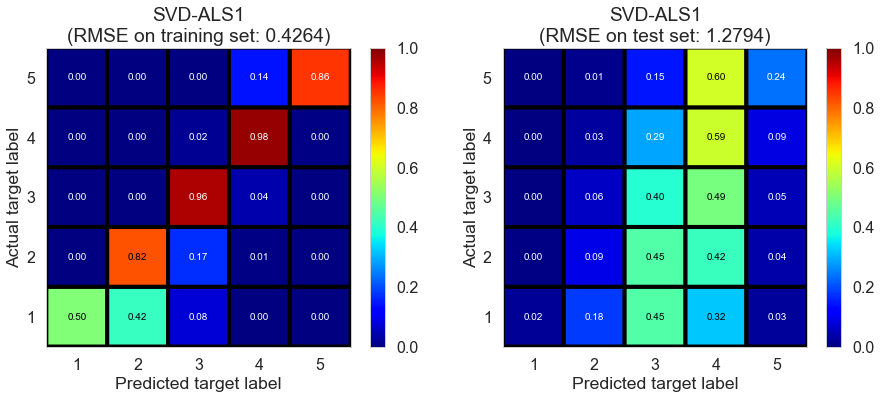

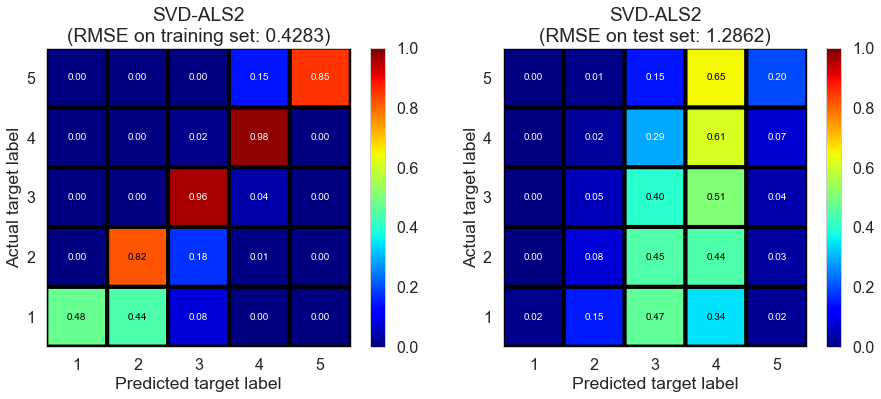

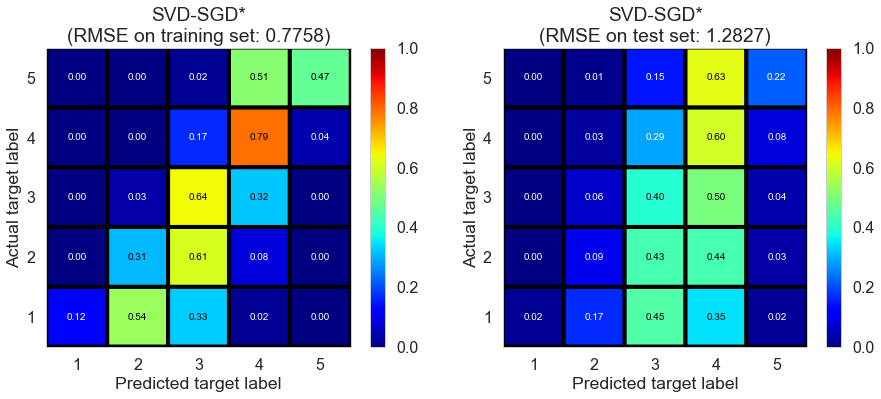

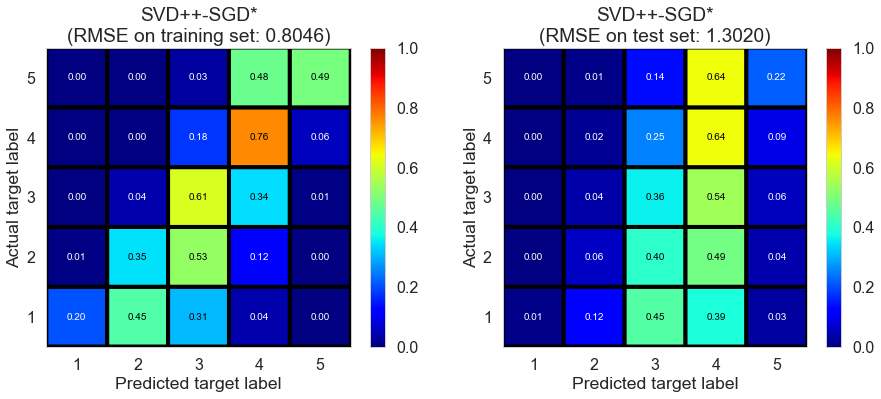

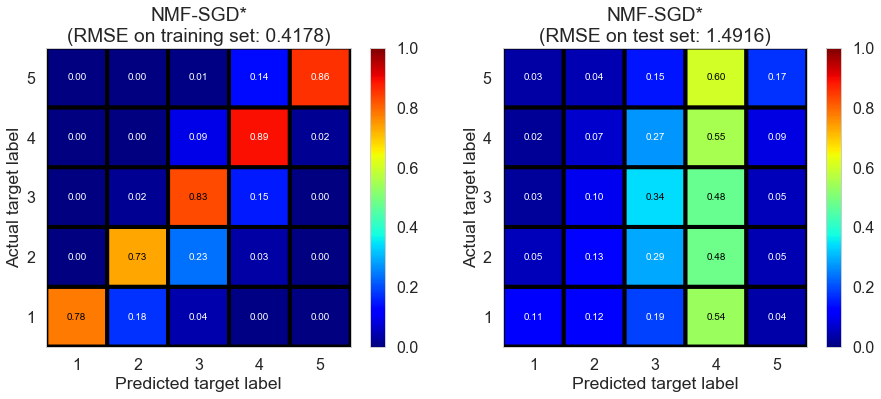

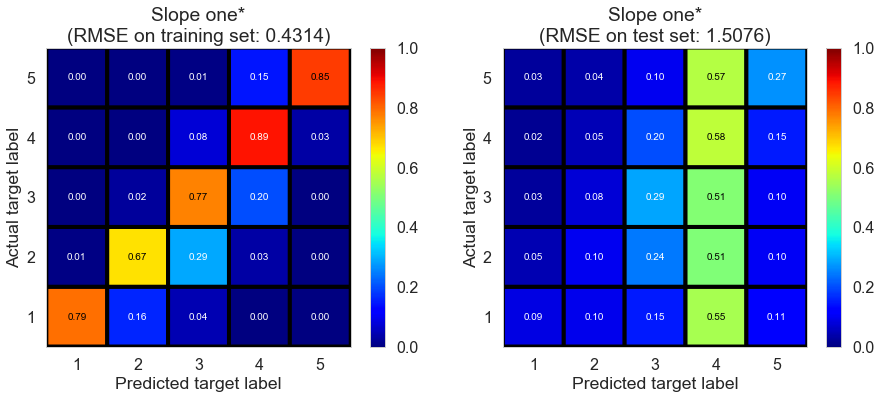

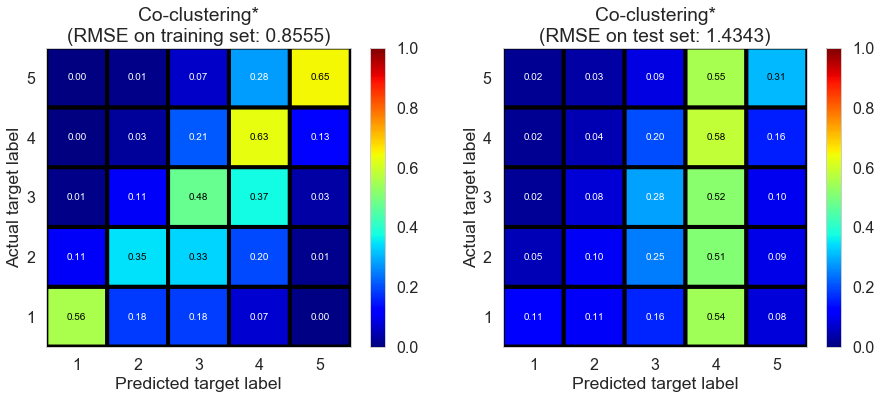

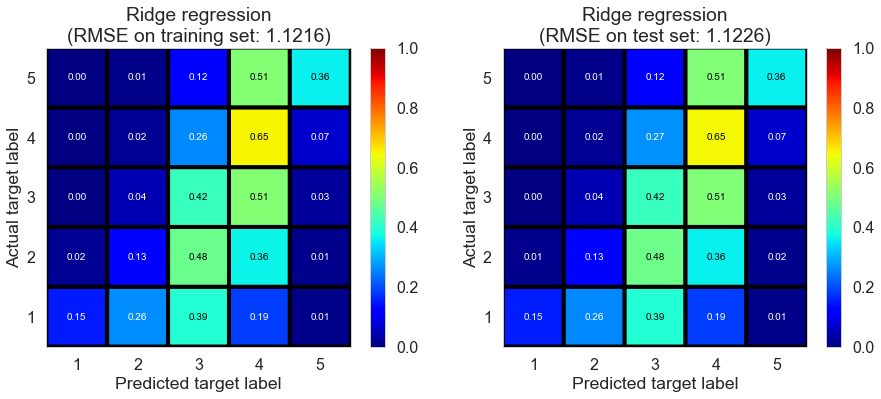

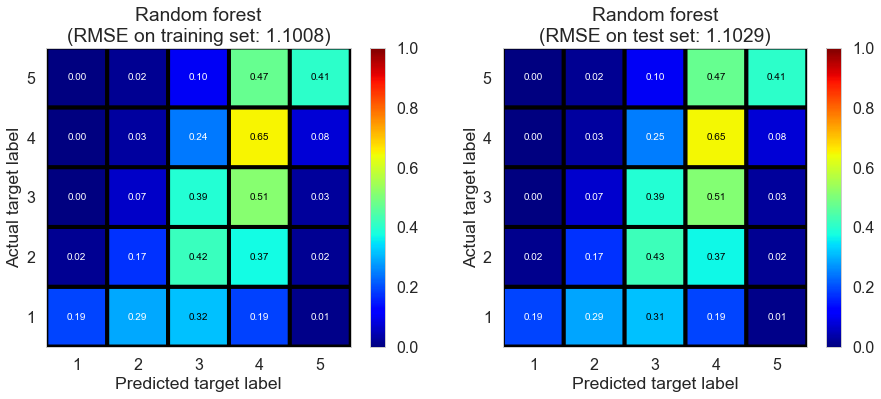

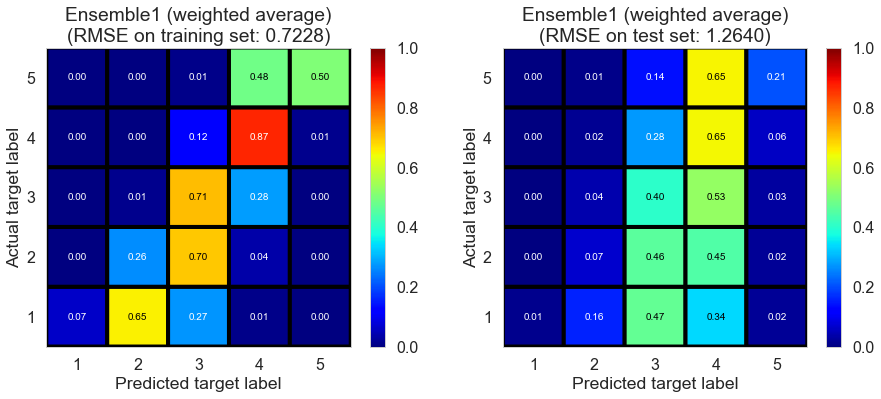

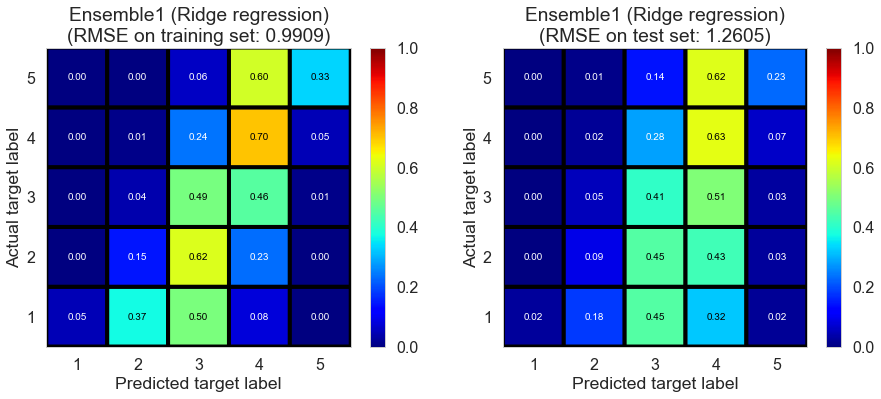

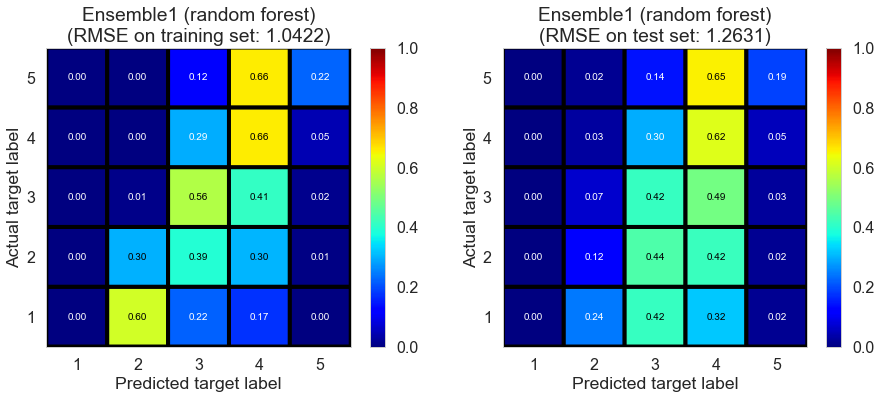

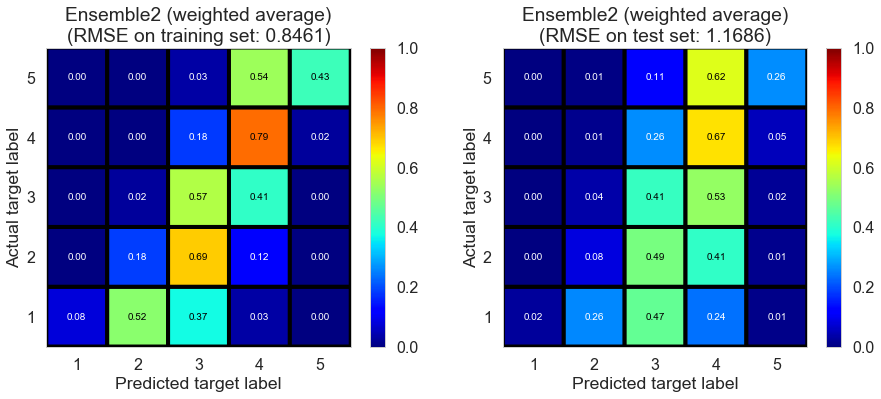

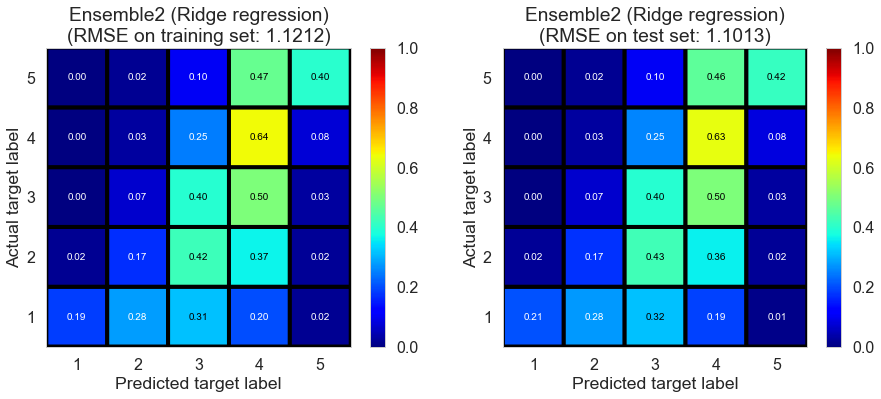

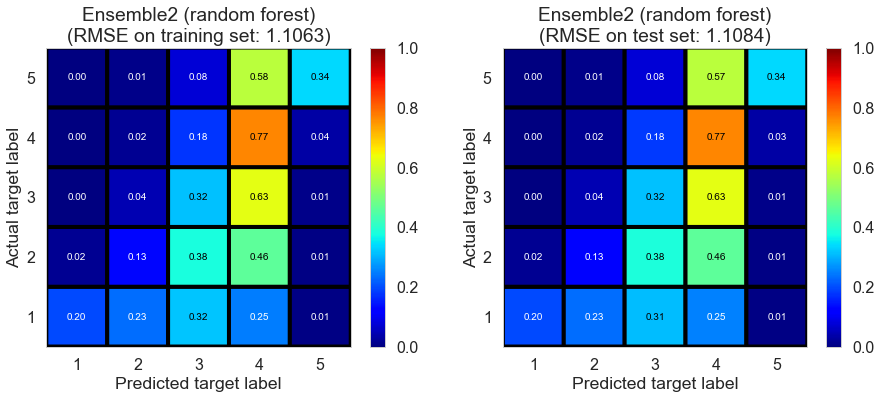

<br><br>

## Full <sup>(4166778 reviews, 131025 restaurants, 1117891 users)</sup>

<sup>(* shows the algorithms we implemented by wrapping around     methods in scikit-surprise python package)</sup>

<sup>(Ensemble1 represents the ensemble of collaborative filtering models;     Ensemble2 represents the ensemble of collaborative filtering and content filtering models)</sup>

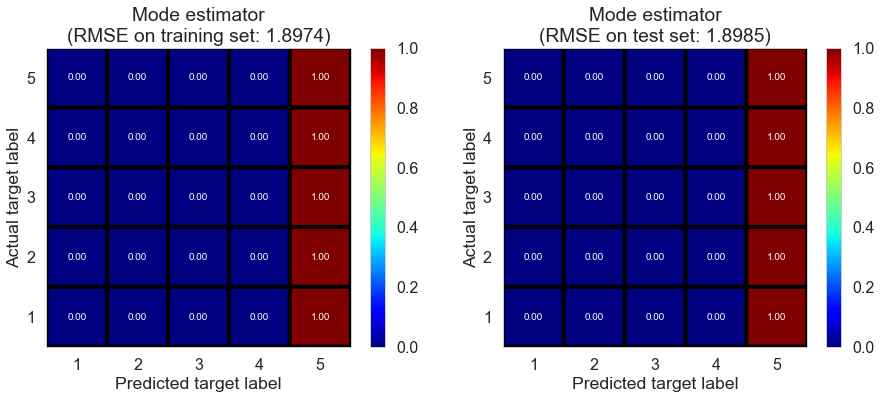

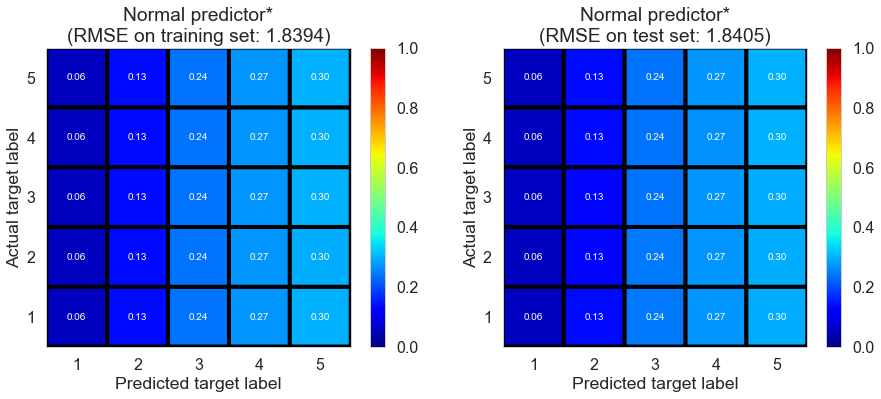

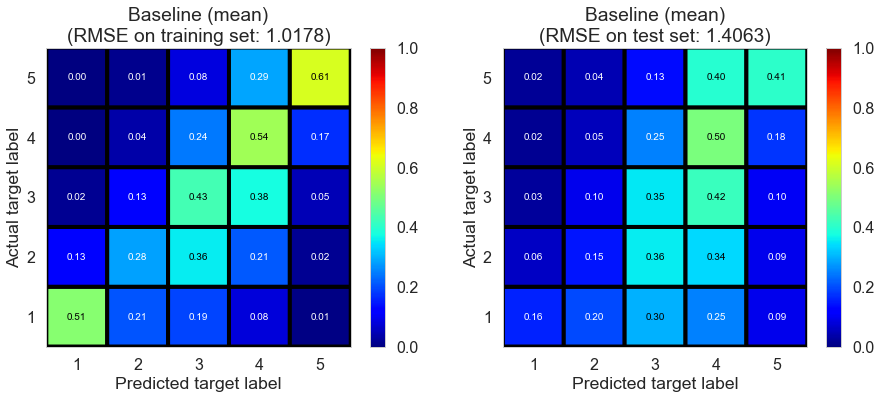

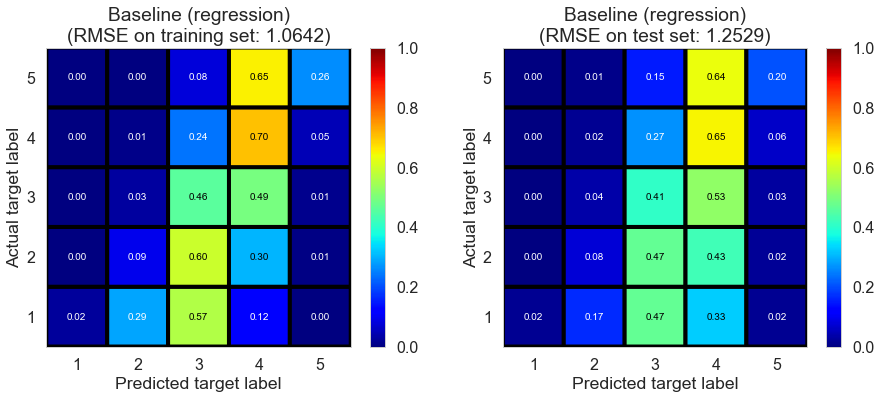

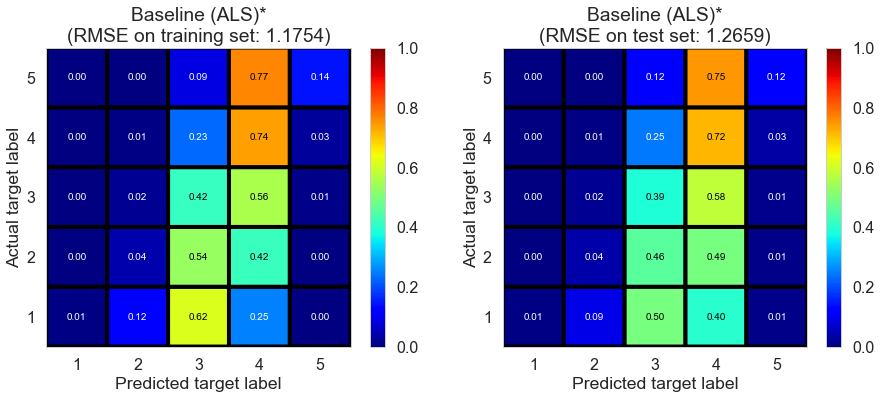

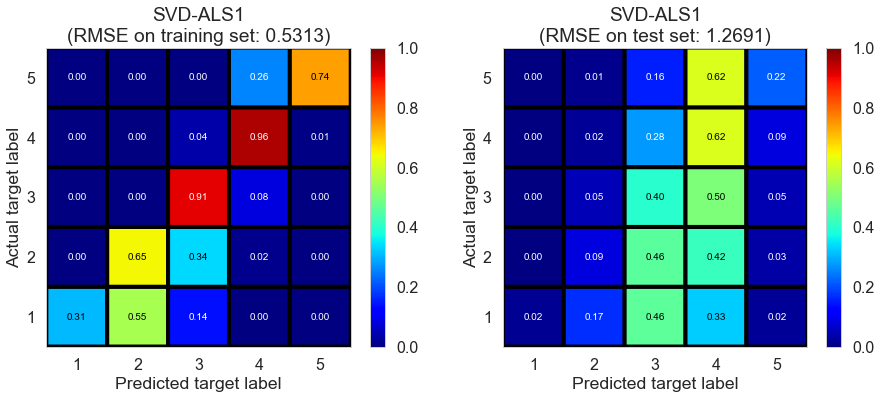

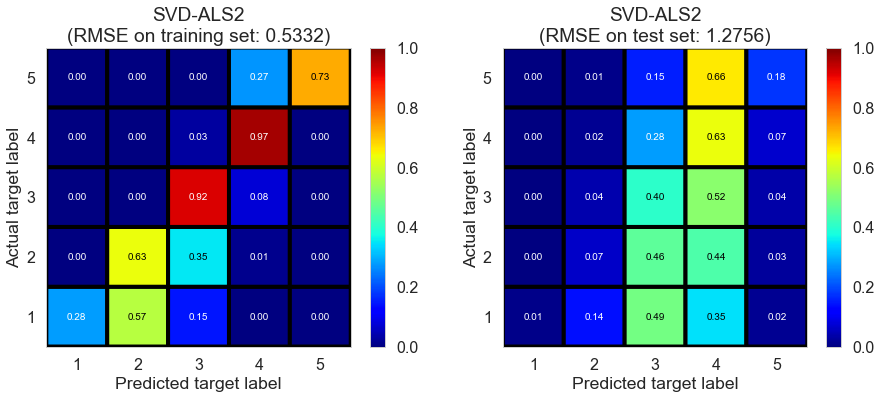

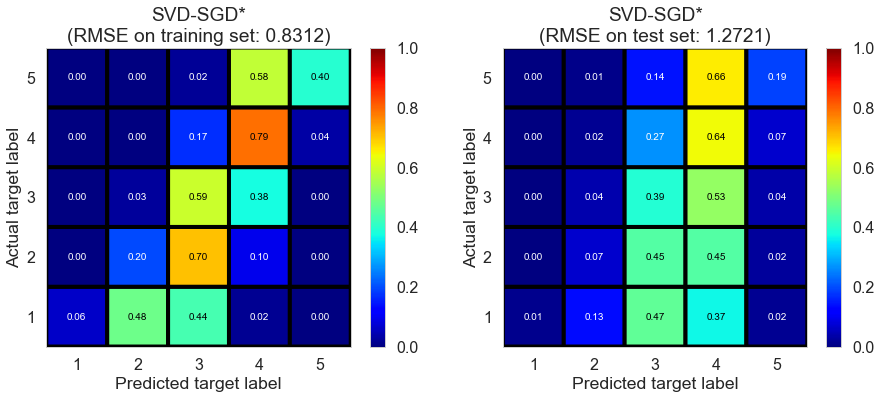

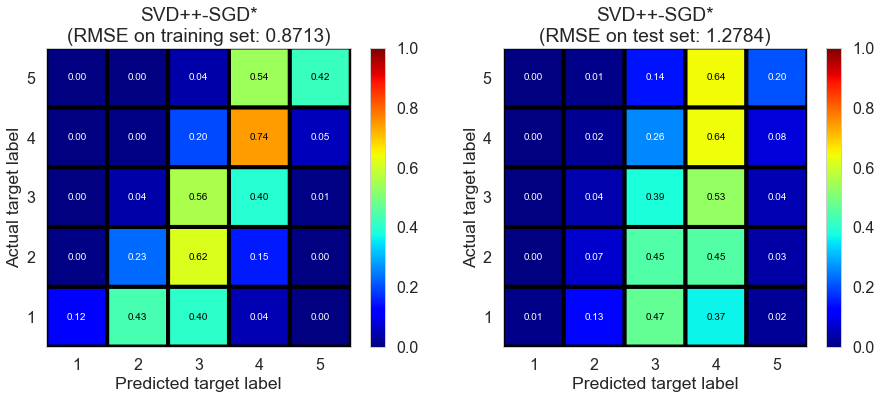

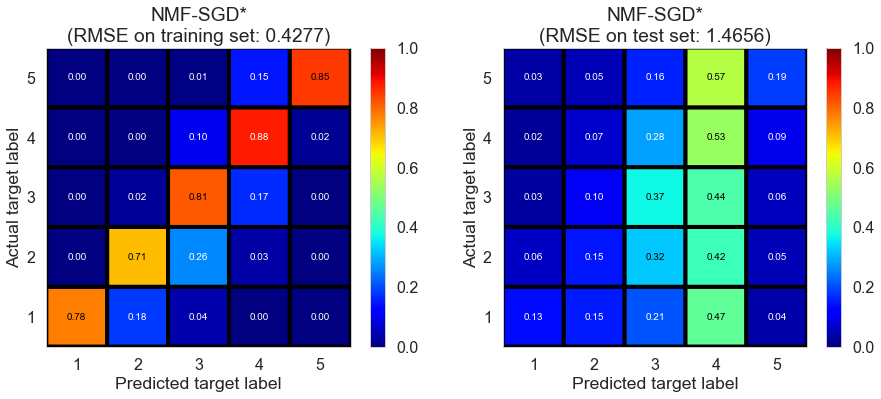

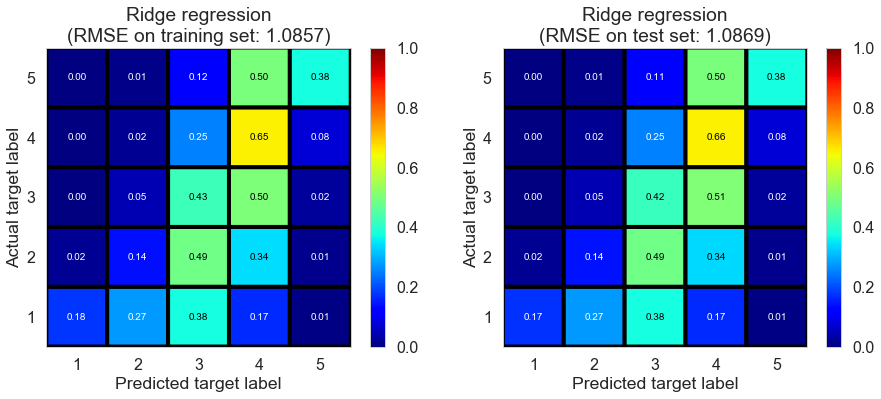

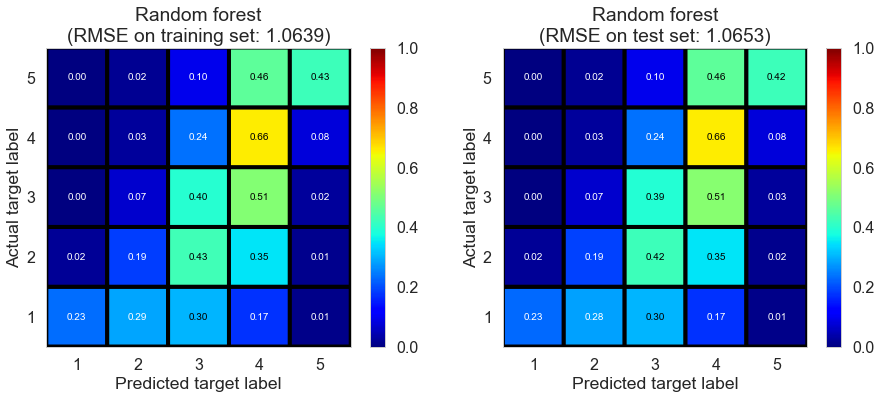

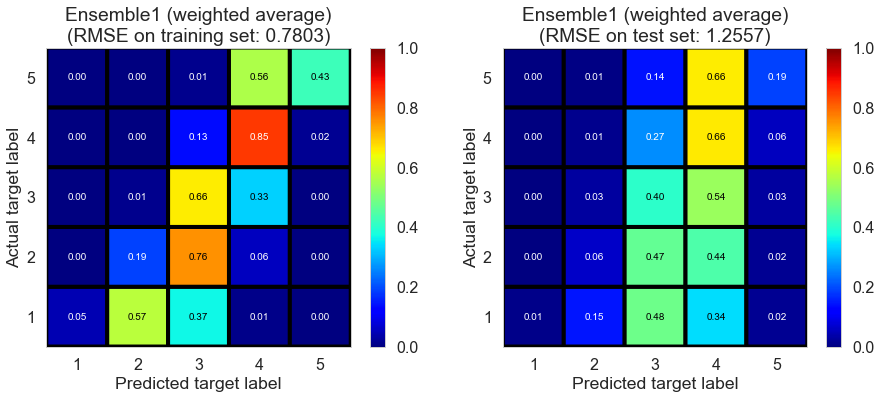

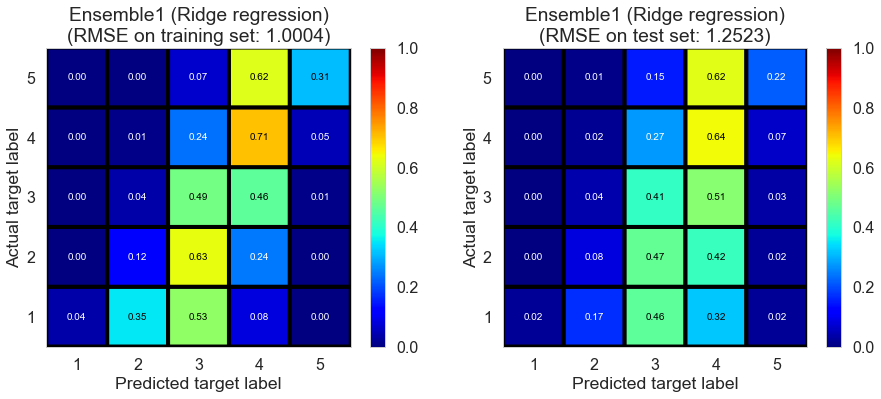

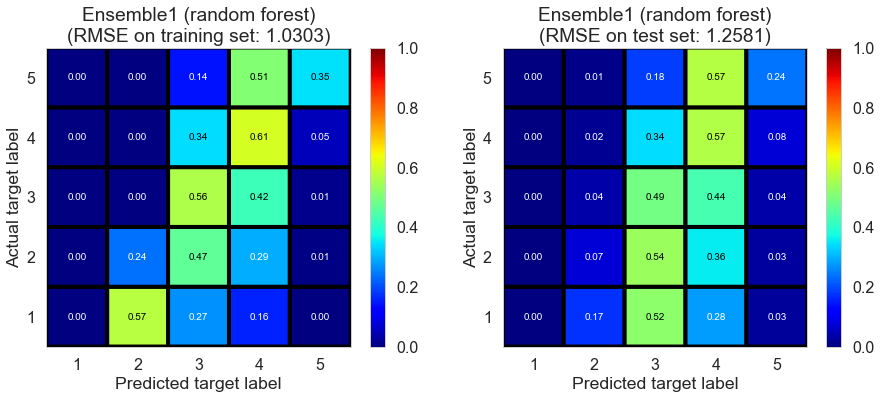

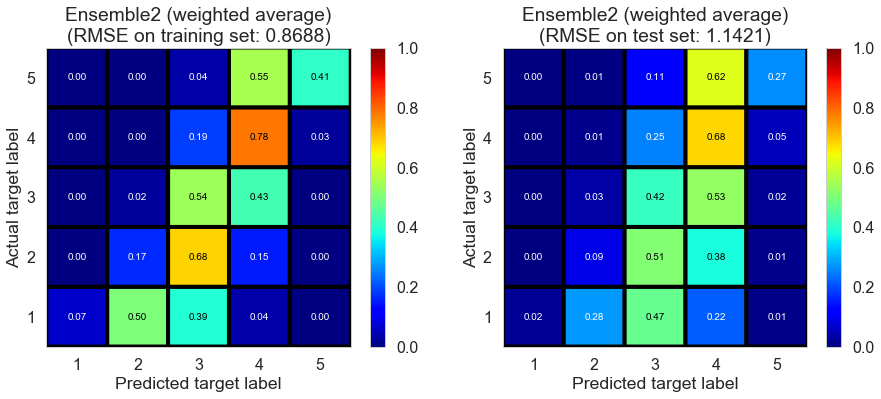

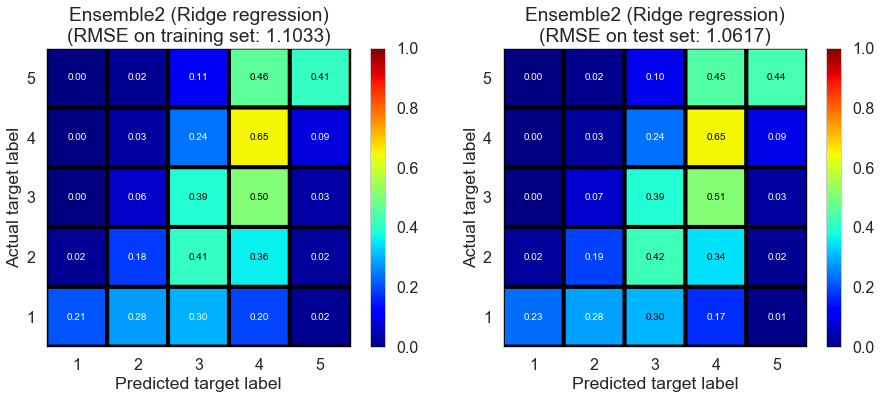

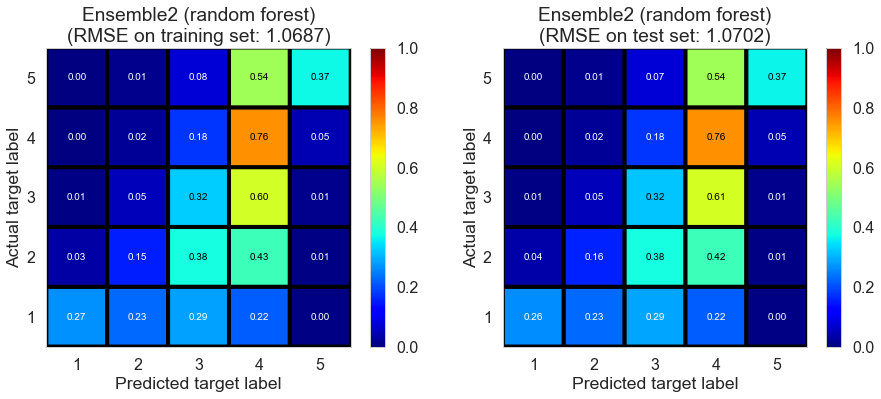

<br><br>

In [2]:
cities = ['Champaign', 'Cleveland', 'Pittsburgh', 'Toronto', 'Las_Vegas', 'Full']

for city in cities:
    data_dir = 'data/{}/'.format(city)
    model_names = IO(data_dir + 'results/model_names.pkl').read_pickle()
    results = IO(data_dir + 'results/results.pkl').read_pickle()
    is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()
    sizes = IO(data_dir + 'sizes.pkl').read_pickle()
    
    display(Markdown('## {} <sup>({} reviews, {} restaurants, {} users)</sup>'.\
                 format(city, sizes[0], sizes[1], sizes[2])))
    #display(Markdown('**Collaborative filtering**'))
    show_summaries(model_names, results, is_successful, title='Collaborative filtering')
    display(Markdown('<sup>(* shows the algorithms we implemented by wrapping around \
    methods in scikit-surprise python package)</sup>'))
    
    model_names = IO(data_dir + 'results05/model_names.pkl').read_pickle()
    results = IO(data_dir + 'results05/results.pkl').read_pickle()
    is_successful = IO(data_dir + 'results05/is_successful.pkl').read_pickle()
    #sizes = IO(data_dir + 'sizes.pkl').read_pickle()

    #display(Markdown('### {} <sup>({} reviews, {} restaurants, {} users)</sup>'.\
                     #format(city, sizes[0], sizes[1], sizes[2])))
    #display(Markdown('**Content filtering**'))
    show_summaries(model_names, results, is_successful, title='Content filtering')
    
    model_names = IO(data_dir + 'results06/model_names.pkl').read_pickle()
    results = IO(data_dir + 'results06/results.pkl').read_pickle()
    is_successful = IO(data_dir + 'results06/is_successful.pkl').read_pickle()
    #sizes = IO(data_dir + 'sizes.pkl').read_pickle()

    #display(Markdown('### {} <sup>({} reviews, {} restaurants, {} users)</sup>'.\
                     #format(city, sizes[0], sizes[1], sizes[2])))
    #display(Markdown('**Ensemble**'))
    show_summaries(model_names, results, is_successful, title='Ensemble estimators')
    display(Markdown('<sup>(Ensemble1 represents the ensemble of collaborative filtering models; \
    Ensemble2 represents the ensemble of collaborative filtering and content filtering models)</sup>'))
    
    # confusion matrix
    
    is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()
    datanames = IO(data_dir + 'results/datanames.pkl').read_pickle()
    model_names = IO(data_dir + 'results/model_names.pkl').read_pickle()
    results = IO(data_dir + 'results/results.pkl').read_pickle()
    X_train, y_train, X_test, y_test, X_cv, y_cv = IO(data_dir + 'data_split.pkl').read_pickle()

    for i in range(len(is_successful)):
        if is_successful[i]:
            model = IO(datanames[i]).read_pickle()
            show_results(model, model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                         results=results[i], show_cv=False, print_=False, show_title=False)
            del model
    
    is_successful = IO(data_dir + 'results05/is_successful.pkl').read_pickle()
    datanames = IO(data_dir + 'results05/datanames.pkl').read_pickle()
    model_names = IO(data_dir + 'results05/model_names.pkl').read_pickle()
    results = IO(data_dir + 'results05/results.pkl').read_pickle()
    X_train, y_train, X_test, y_test, X_cv, y_cv = IO(data_dir + '05_data_split.pkl').read_pickle()

    for i in range(len(is_successful)):
        if is_successful[i]:
            model = IO(datanames[i]).read_pickle()
            show_results(model, model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                         results=results[i], show_cv=False, print_=False, show_title=False)
            del model
            
    is_successful = IO(data_dir + 'results06/is_successful.pkl').read_pickle()
    datanames = IO(data_dir + 'results06/datanames.pkl').read_pickle()
    model_names = IO(data_dir + 'results06/model_names.pkl').read_pickle()
    results = IO(data_dir + 'results06/results.pkl').read_pickle()
    X_train, y_train, X_test, y_test, X_cv, y_cv = IO(data_dir + 'data_split.pkl').read_pickle()

    for i in range(len(is_successful)):
        if is_successful[i]:
            model = IO(datanames[i]).read_pickle()
            show_results(model, model_names[i], None, y_train, None, y_test, results=results[i], \
                         show_cv=False, print_=False, show_title=False)
            del model
    
    display(Markdown('''<br><br>'''))